## 1. Library Import
- ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.

In [4]:
!pip install eli5==0.13.0

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÇ¨Ïö©ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.
!apt-get install -y fonts-nanum

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [5]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ΩÎ°ú
    name='NanumBarunGothic')                        # Ïù¥ Ìè∞Ìä∏Ïùò ÏõêÌïòÎäî Ïù¥Î¶Ñ ÏÑ§Ï†ï
fm.fontManager.ttflist.insert(0, fe)              # MatplotlibÏóê Ìè∞Ìä∏ Ï∂îÍ∞Ä
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

## 2. Data Load

#### 2.1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [6]:
# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º Load ÌïòÍ≤†ÏäµÎãàÎã§. Í≤ΩÎ°úÎäî ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï£ºÏÑ∏Ïöî Ìï©ÎãàÎã§.
train_path = "/home/realtheai/documents/upstage-ml-regression-sigma7/train.csv"
test_path = "/home/realtheai/documents/upstage-ml-regression-sigma7/test.csv"

dt_train = pd.read_csv(train_path)  # train Îç∞Ïù¥ÌÑ∞
dt_test = pd.read_csv(test_path)    # test Îç∞Ïù¥ÌÑ∞

# Train dataÏôÄ Test data shapeÏùÑ Ïù¥Î†áÍ≤å ÌôïÏù∏Ìï©ÎãàÎã§.
print('Train data shape : ', dt_train.shape, 'Test data shape : ', dt_test.shape)

Train data shape :  (1118822, 52) Test data shape :  (9272, 51)


In [7]:
# Train dataÏôÄ Test data shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print('Train data shape : ', dt_train.shape, 'Test data shape : ', dt_test.shape)

Train data shape :  (1118822, 52) Test data shape :  (9272, 51)


## 3. Data Preprocessing

- Î™®Îç∏ÎßÅ Ï†ÑÏóê Îç∞Ïù¥ÌÑ∞ ÎÇ¥ Í≤∞Ï∏°Ïπò, Ïù¥ÏÉÅÏπò Îì±ÏùÑ Ï†úÍ±∞ÌïòÍ≥† Î≤îÏ£ºÌòïÍ≥º Ïó∞ÏÜçÌòï Î≥ÄÏàòÎ•º ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§!
- Î®ºÏ†Ä, Ïö©Ïù¥Ìïú Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ trainÍ≥º test dataÎ•º Ìï©Ïπú ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÏßÑÌñâÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [8]:
# train/test Íµ¨Î∂ÑÏùÑ ÏúÑÌïú ÏπºÎüºÏùÑ ÌïòÎÇò ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§.
dt_train['is_test'] = 0
dt_test['is_test'] = 1
concat = pd.concat([dt_train, dt_test])     # ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎì§Ïñ¥Ï§çÎãàÎã§.

In [8]:
# train/test Íµ¨Î∂ÑÏùÑ ÏúÑÌïú ÏπºÎüºÏùÑ ÌïòÎÇò ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§.
dt_train['is_test'] = 0
dt_test['is_test'] = 1
concat = pd.concat([dt_train, dt_test])     # ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎì§Ïñ¥Ï§çÎãàÎã§.

In [9]:
concat['is_test'].value_counts()      # trainÍ≥º test dataÍ∞Ä ÌïòÎÇòÎ°ú Ìï©Ï≥êÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

0    1118822
1       9272
Name: is_test, dtype: int64

In [10]:
# ÏπºÎüº Ïù¥Î¶ÑÏùÑ ÏâΩÍ≤å Î∞îÍøîÏ£ºÍ≤†ÏäµÎãàÎã§. Îã§Î•∏ ÏπºÎüºÎèÑ ÏÇ¨Ïö©Ïóê Îî∞Îùº Î∞îÍøîÏ£ºÏÖîÎèÑ Îê©ÎãàÎã§!
concat = concat.rename(columns={'Ï†ÑÏö©Î©¥Ï†Å(„é°)':'Ï†ÑÏö©Î©¥Ï†Å'})


In [11]:
# Ïã§Ï†úÎ°ú Í≤∞Ï∏°ÏπòÎùºÍ≥† ÌëúÏãúÎäî ÏïàÎêòÏñ¥ÏûàÏßÄÎßå ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî elementÎì§Ïù¥ ÏïÑÎûòÏôÄ Í∞ôÏù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§.
# ÏïÑÎûò 3Í∞ÄÏßÄÏùò Í≤ΩÏö∞ Î™®Îëê ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî elementÍ∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
display(concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].value_counts())

            1111271
20230630        585
20230831        496
20230428        394
20230731        374
             ...   
20230105          3
20230125          3
20230109          1
20230102          1
20230104          1
Name: Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê, Length: 182, dtype: int64

In [12]:
display(concat['Í±∞ÎûòÏú†Ìòï'].value_counts())

-       1086451
Ï§ëÍ∞úÍ±∞Îûò      38123
ÏßÅÍ±∞Îûò        3520
Name: Í±∞ÎûòÏú†Ìòï, dtype: int64

In [13]:
display(concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].value_counts())

-                    1090013
ÏÑúÏö∏ ÎÖ∏ÏõêÍµ¨                  2627
ÏÑúÏö∏ ÏÜ°ÌååÍµ¨                  2540
ÏÑúÏö∏ Í∞ïÎÇ®Íµ¨                  2508
ÏÑúÏö∏ Í∞ïÎèôÍµ¨                  2038
                      ...   
ÏÑúÏö∏ Í∞ïÎ∂ÅÍµ¨, ÏÑúÏö∏ ÏñëÏ≤úÍµ¨             1
Í≤ΩÍ∏∞ ÎÇ®ÏñëÏ£ºÏãú, Í≤ΩÍ∏∞ ÏÑ±ÎÇ®ÏàòÏ†ïÍµ¨          1
ÏÑúÏö∏ ÏÜ°ÌååÍµ¨, Ïù∏Ï≤ú Í≥ÑÏñëÍµ¨             1
Í≤ΩÍ∏∞ Ïó∞Ï≤úÍµ∞, ÏÑúÏö∏ ÏÜ°ÌååÍµ¨             1
ÏÑúÏö∏ Ï§ëÎûëÍµ¨, Ïù∏Ï≤ú Î∂ÄÌèâÍµ¨             1
Name: Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ, Length: 739, dtype: int64

In [15]:
# ÏúÑ Ï≤òÎüº ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî ÏπºÎüºÏùÄ Í≤∞Ï∏°ÏπòÏôÄ Í∞ôÏùÄ Ïó≠Ìï†ÏùÑ ÌïòÎØÄÎ°ú, np.nanÏúºÎ°ú Ï±ÑÏõå Í≤∞Ï∏°ÏπòÎ°ú Ïù∏ÏãùÎêòÎèÑÎ°ù Ìï©ÎãàÎã§.
concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'] = concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].replace(' ', np.nan)
concat['Í±∞ÎûòÏú†Ìòï'] = concat['Í±∞ÎûòÏú†Ìòï'].replace('-', np.nan)
concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'] = concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].replace('-', np.nan)

In [14]:
# EDAÏóê ÏïûÏÑú Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat.isnull().sum()

ÏãúÍµ∞Íµ¨                             0
Î≤àÏßÄ                            227
Î≥∏Î≤à                             75
Î∂ÄÎ≤à                             75
ÏïÑÌååÌä∏Î™Ö                         2136
Ï†ÑÏö©Î©¥Ï†Å                            0
Í≥ÑÏïΩÎÖÑÏõî                            0
Í≥ÑÏïΩÏùº                             0
Ï∏µ                               0
Í±¥Ï∂ïÎÖÑÎèÑ                            0
ÎèÑÎ°úÎ™Ö                             0
Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                   1121899
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                          0
Í±∞ÎûòÏú†Ìòï                            0
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ                          0
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)         877273
k-Ï†ÑÌôîÎ≤àÌò∏                     876850
k-Ìå©Ïä§Î≤àÌò∏                     879348
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob                1058958
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)               876125
k-Í¥ÄÎ¶¨Î∞©Ïãù                     876125
k-Î≥µÎèÑÏú†Ìòï                     876454
k-ÎÇúÎ∞©Î∞©Ïãù                     876125
k-Ï†ÑÏ≤¥ÎèôÏàò

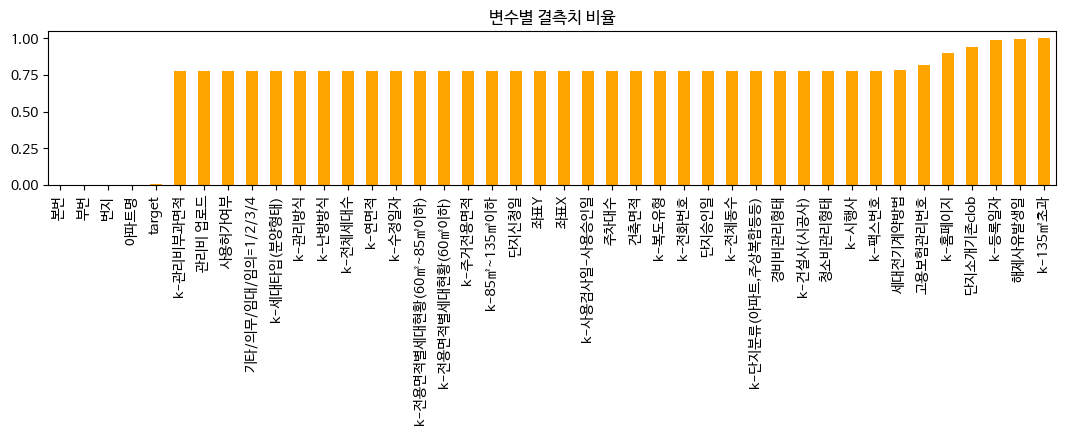

In [15]:
# Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°ÏπòÏùò ÎπÑÏú®ÏùÑ plotÏúºÎ°ú Í∑∏Î†§Î≥¥Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
fig = plt.figure(figsize=(13, 2))
missing = concat.isnull().sum() / concat.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Ïπò ÎπÑÏú®')
plt.show()

- ÏúÑ Í∑∏ÎûòÌîÑÏóêÏÑú Î≥º Ïàò ÏûàÎã§ÏãúÌîº Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÎì§ÏùÄ Í≤∞Ï∏°ÏπòÍ∞Ä Ìï¥Îãπ ÏπºÎüºÏùò element Ï§ë 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî ÏÉÅÌô©Ïù¥ Îê©ÎãàÎã§.
- Îî∞ÎùºÏÑú Î≥∏ Baseline ÏóêÏÑúÎäî Ïù¥ ÏπºÎüºÏùÄ ÏòàÏ∏°Ïóê ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÎäîÎã§Í≥† ÌåêÎã®Ìï¥ ÏÇ≠Ï†úÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [16]:
# NullÍ∞íÏù¥ 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÏùÄ ÏÇ≠Ï†úÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
print('* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§ :', list(concat.columns[concat.isnull().sum() <= 1000000]))     # ÎÇ®Í≤®Ïßà Î≥ÄÏàòÎì§ÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print('* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ Î≥ÄÏàòÎì§ :', list(concat.columns[concat.isnull().sum() >= 1000000]))

* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§ : ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëú

In [17]:
# ÏúÑÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§Îßå Í≥®Îùº ÏÉàÎ°úÏö¥ concat_select Í∞ùÏ≤¥Î°ú Ï†ÄÏû•Ìï¥Ï§çÎãàÎã§.
selected = list(concat.columns[concat.isnull().sum() <= 1000000])
concat_select = concat[selected]

In [18]:
concat_select.isnull().sum()     # Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ï¥àÍ≥ºÏù∏ ÏπºÎüºÏù¥ Ï†úÍ±∞Îêú Î™®ÏäµÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
# targetÎ≥ÄÏàòÎäî test dataset Í∞úÏàòÎßåÌÅº(9272) Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

ÏãúÍµ∞Íµ¨                            0
Î≤àÏßÄ                           227
Î≥∏Î≤à                            75
Î∂ÄÎ≤à                            75
ÏïÑÌååÌä∏Î™Ö                        2136
Ï†ÑÏö©Î©¥Ï†Å                           0
Í≥ÑÏïΩÎÖÑÏõî                           0
Í≥ÑÏïΩÏùº                            0
Ï∏µ                              0
Í±¥Ï∂ïÎÖÑÎèÑ                           0
ÎèÑÎ°úÎ™Ö                            0
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                         0
Í±∞ÎûòÏú†Ìòï                           0
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ                         0
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)        877273
k-Ï†ÑÌôîÎ≤àÌò∏                    876850
k-Ìå©Ïä§Î≤àÌò∏                    879348
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)              876125
k-Í¥ÄÎ¶¨Î∞©Ïãù                    876125
k-Î≥µÎèÑÏú†Ìòï                    876454
k-ÎÇúÎ∞©Î∞©Ïãù                    876125
k-Ï†ÑÏ≤¥ÎèôÏàò                    877207
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                   876125
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                877637


In [19]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàòÎäî ÏÑ†ÌòïÎ≥¥Í∞ÑÏùÑ Ìï¥Ï£ºÍ≥†, Î≤îÏ£ºÌòïÎ≥ÄÏàòÎäî ÏïåÏàòÏóÜÍ∏∞Ïóê ‚Äúunknown‚ÄùÏù¥ÎùºÍ≥† ÏûÑÏùòÎ°ú Î≥¥Í∞ÑÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 48 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1128094 non-null  object 
 1   Î≤àÏßÄ                      1127867 non-null  object 
 2   Î≥∏Î≤à                      1128019 non-null  float64
 3   Î∂ÄÎ≤à                      1128019 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1125958 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å                    1128094 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1128094 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1128094 non-null  int64  
 8   Ï∏µ                       1128094 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1128094 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1128094 non-null  object 
 11  Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                  1128094 non-null  object 
 12  Í±∞ÎûòÏú†Ìòï                    1128094

In [20]:
# Î≥∏Î≤à, Î∂ÄÎ≤àÏùò Í≤ΩÏö∞ floatÎ°ú ÎêòÏñ¥ÏûàÏßÄÎßå Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò ÏùòÎØ∏Î•º Í∞ÄÏßÄÎØÄÎ°ú object(string) ÌòïÌÉúÎ°ú Î∞îÍæ∏Ïñ¥Ï£ºÍ≥† ÏïÑÎûò ÏûëÏóÖÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
concat_select['Î≥∏Î≤à'] = concat_select['Î≥∏Î≤à'].astype('str')
concat_select['Î∂ÄÎ≤à'] = concat_select['Î∂ÄÎ≤à'].astype('str')

In [21]:
# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns = []
categorical_columns = []

for column in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'is_test']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨Î

- Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä ÏïåÎßûÍ≤å ÎÇòÎàÑÏñ¥Ï°åÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í≥†, Ïù¥Ï†ú Í∞ÅÍ∞Å Î≥¥Í∞ÑÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

In [22]:
# Í∞úÏÑ†Îêú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Î∞©Î≤ï
# Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Í≤∞Ï∏°ÏπòÎ•º ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥ (Ï¢ÄÎçî Ïú†ÏùòÎØ∏)
for col in categorical_columns:
    if concat_select[col].isnull().sum() > 0:
        mode_value = concat_select[col].mode()
        if len(mode_value) > 0:
            concat_select[col].fillna(mode_value[0], inplace=True)
        else:
            # ÏµúÎπàÍ∞íÏù¥ ÏóÜÎäî Í≤ΩÏö∞ÏóêÎßå 'NULL'Î°ú ÎåÄÏ≤¥
            concat_select[col].fillna('NULL', inplace=True)

# Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùò Í≤∞Ï∏°ÏπòÎ•º Í∑∏Î£πÎ≥Ñ ÌèâÍ∑†/Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥ (Ï¢ÄÎçî Ï†ïÌôï)
for col in continuous_columns:
    if concat_select[col].isnull().sum() > 0:
        # ÏãúÍµ∞Íµ¨Î≥Ñ Í∑∏Î£π ÌèâÍ∑†ÏúºÎ°ú ÎåÄÏ≤¥ (ÏßÄÏó≠Î≥Ñ ÌäπÏÑ± Î∞òÏòÅ)
        if 'ÏãúÍµ∞Íµ¨' in concat_select.columns:
            concat_select[col] = concat_select.groupby('ÏãúÍµ∞Íµ¨')[col].transform(
                lambda x: x.fillna(x.median())
            )
        # Ïó¨Ï†ÑÌûà Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎã§Î©¥ Ï†ÑÏ≤¥ Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
        if concat_select[col].isnull().sum() > 0:
            concat_select[col].fillna(concat_select[col].median(), inplace=True)

In [23]:
concat_select.isnull().sum()         # Í≤∞Ï∏°ÏπòÍ∞Ä Î≥¥Í∞ÑÎêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§.

ÏãúÍµ∞Íµ¨                       0
Î≤àÏßÄ                        0
Î≥∏Î≤à                        0
Î∂ÄÎ≤à                        0
ÏïÑÌååÌä∏Î™Ö                      0
Ï†ÑÏö©Î©¥Ï†Å                      0
Í≥ÑÏïΩÎÖÑÏõî                      0
Í≥ÑÏïΩÏùº                       0
Ï∏µ                         0
Í±¥Ï∂ïÎÖÑÎèÑ                      0
ÎèÑÎ°úÎ™Ö                       0
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                    0
Í±∞ÎûòÏú†Ìòï                      0
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ                    0
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)        0
k-Ï†ÑÌôîÎ≤àÌò∏                    0
k-Ìå©Ïä§Î≤àÌò∏                    0
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)              0
k-Í¥ÄÎ¶¨Î∞©Ïãù                    0
k-Î≥µÎèÑÏú†Ìòï                    0
k-ÎÇúÎ∞©Î∞©Ïãù                    0
k-Ï†ÑÏ≤¥ÎèôÏàò                    0
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                   0
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                0
k-ÏãúÌñâÏÇ¨                     0
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº             0
k-Ïó∞Î©¥Ï†Å                     0
k-Ï£

- BaselineÏóêÏÑúÎäî Îã®Ïàú Í≤∞Ï∏°ÏπòÎì§ÏùÑ Ï†úÍ±∞ÌïòÍ±∞ÎÇò Î≥¥Í∞ÑÌñàÏßÄÎßå,
EDAÎ•º ÌÜµÌï¥ Î≥ÄÏàòÎì§Ïùò ÌùêÎ¶ÑÏùÑ Ï°∞Í∏à Îçî ÌååÏïÖÌïòÍ≥† Îçî ÎÇòÏùÄ interpolation Îì±Ïùò Î∞©Î≤ïÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏùÑ Í≤É Í∞ôÏäµÎãàÎã§.

### 3.2. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
- Ïù¥Î≤àÏóî Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨Ìï¥Î¥ÖÏãúÎã§.
- Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏùÄ IQR, Z-score Îì± Îã§ÏñëÌïú Î∞©Î≤ïÏù¥ ÏûàÏäµÎãàÎã§. Í∞ÄÏû• ÏâΩÍ≥† ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Ï†ëÍ∑ºÌïòÎäî Î∞©Î≤ïÏùÄ Í∏∞Î≥∏ ÌÜµÍ≥ÑÏπòÎ•º Ïù¥Ïö©ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.
- Î≥∏ baselineÏóêÏÑúÎäî IQRÎ•º Ïù¥Ïö©Ìïú Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.

In [24]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ïù¥Ï†ÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print(concat_select.shape)

(1128094, 48)


In [25]:
# Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôòÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Ï∂îÍ∞Ä
from scipy import stats
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

# Ïó∞ÏÜçÌòï Î≥ÄÏàòÎì§Ïùò ÏôúÎèÑ(skewness) ÌôïÏù∏
print("=== Ïó∞ÏÜçÌòï Î≥ÄÏàòÎì§Ïùò ÏôúÎèÑ Î∂ÑÏÑù ===")
skewness_data = []

for col in continuous_columns:
    if col not in ['target', 'is_test'] and concat_select[col].nunique() > 10:
        skew_val = concat_select[col].skew()
        skewness_data.append({
            'variable': col,
            'skewness': skew_val,
            'abs_skewness': abs(skew_val)
        })

# ÏôúÎèÑ Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
skewness_df = pd.DataFrame(skewness_data).sort_values('abs_skewness', ascending=False)
print(skewness_df.head(10))

# ÏôúÎèÑÍ∞Ä Ïã¨Ìïú Î≥ÄÏàòÎì§ (Ï†àÎåìÍ∞í > 1.0) ÌôïÏù∏
high_skew_vars = skewness_df[skewness_df['abs_skewness'] > 1.0]['variable'].tolist()
print(f"\nÏôúÎèÑÍ∞Ä Ïã¨Ìïú Î≥ÄÏàòÎì§ (|skewness| > 1.0): {len(high_skew_vars)}Í∞ú")
print(high_skew_vars)


=== Ïó∞ÏÜçÌòï Î≥ÄÏàòÎì§Ïùò ÏôúÎèÑ Î∂ÑÏÑù ===
                  variable   skewness  abs_skewness
13                    Í±¥Ï∂ïÎ©¥Ï†Å  19.734509     19.734509
7                    k-Ïó∞Î©¥Ï†Å   4.702542      4.702542
11  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)   4.622848      4.622848
5                   k-Ï†ÑÏ≤¥ÎèôÏàò   4.354051      4.354051
10      k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)   3.620012      3.620012
12            k-85„é°~135„é°Ïù¥Ìïò   3.191328      3.191328
9                k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å   2.959602      2.959602
8                 k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å   2.948739      2.948739
14                    Ï£ºÏ∞®ÎåÄÏàò   2.881519      2.881519
6                  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò   2.568501      2.568501

ÏôúÎèÑÍ∞Ä Ïã¨Ìïú Î≥ÄÏàòÎì§ (|skewness| > 1.0): 12Í∞ú
['Í±¥Ï∂ïÎ©¥Ï†Å', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï£º

In [26]:
# Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò Ìï®Ïàò Ï†ïÏùò
def apply_transformations(data, columns_to_transform):
    """
    ÏôúÎèÑÍ∞Ä Ïã¨Ìïú Î≥ÄÏàòÎì§Ïóê ÎåÄÌï¥ Îã§ÏñëÌïú Î≥ÄÌôò Í∏∞Î≤ïÏùÑ Ï†ÅÏö©ÌïòÍ≥† 
    Í∞ÄÏû• Ï†ÅÌï©Ìïú Î≥ÄÌôòÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.
    """
    transformed_data = data.copy()
    transformation_log = []
    
    for col in columns_to_transform:
        if col in transformed_data.columns:
            original_skew = abs(transformed_data[col].skew())
            
            # ÏùåÏàòÍ∞íÏù¥ ÏûàÎäî Í≤ΩÏö∞ ÏµúÏÜåÍ∞íÎßåÌÅº Ïù¥Îèô
            min_val = transformed_data[col].min()
            if min_val <= 0:
                shift_value = abs(min_val) + 1
                shifted_col = transformed_data[col] + shift_value
            else:
                shifted_col = transformed_data[col]
                shift_value = 0
            
            transformations = {}
            
            # 1. Î°úÍ∑∏ Î≥ÄÌôò
            try:
                log_transformed = np.log(shifted_col)
                log_skew = abs(log_transformed.skew())
                transformations['log'] = {'data': log_transformed, 'skewness': log_skew}
            except:
                pass
            
            # 2. Ï†úÍ≥±Í∑º Î≥ÄÌôò  
            try:
                sqrt_transformed = np.sqrt(shifted_col)
                sqrt_skew = abs(sqrt_transformed.skew())
                transformations['sqrt'] = {'data': sqrt_transformed, 'skewness': sqrt_skew}
            except:
                pass
            
            # 3. Box-Cox Î≥ÄÌôò (ÏñëÏàòÏù∏ Í≤ΩÏö∞ÏóêÎßå)
            try:
                if (shifted_col > 0).all():
                    boxcox_transformed, lambda_val = boxcox(shifted_col)
                    boxcox_skew = abs(pd.Series(boxcox_transformed).skew())
                    transformations['boxcox'] = {
                        'data': pd.Series(boxcox_transformed), 
                        'skewness': boxcox_skew,
                        'lambda': lambda_val
                    }
            except:
                pass
            
            # Í∞ÄÏû• Ï¢ãÏùÄ Î≥ÄÌôò ÏÑ†ÌÉù (ÏôúÎèÑÍ∞Ä Í∞ÄÏû• ÎÇÆÏùÄ Í≤É)
            if transformations:
                best_transform = min(transformations.keys(), 
                                   key=lambda x: transformations[x]['skewness'])
                
                # ÏõêÎûò ÏôúÎèÑÎ≥¥Îã§ Í∞úÏÑ†Îêú Í≤ΩÏö∞ÏóêÎßå Ï†ÅÏö©
                if transformations[best_transform]['skewness'] < original_skew:
                    transformed_data[col] = transformations[best_transform]['data']
                    transformation_log.append({
                        'variable': col,
                        'original_skewness': original_skew,
                        'transformation': best_transform,
                        'new_skewness': transformations[best_transform]['skewness'],
                        'improvement': original_skew - transformations[best_transform]['skewness'],
                        'shift_value': shift_value
                    })
                else:
                    transformation_log.append({
                        'variable': col,
                        'original_skewness': original_skew,
                        'transformation': 'none',
                        'new_skewness': original_skew,
                        'improvement': 0,
                        'shift_value': 0
                    })
    
    return transformed_data, transformation_log

# Î≥ÄÌôò Ï†ÅÏö©
print("=== Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò Ï†ÅÏö© Ï§ë... ===")
concat_transformed, transform_log = apply_transformations(concat_select, high_skew_vars)

# Î≥ÄÌôò Í≤∞Í≥º Ï∂úÎ†•
transform_df = pd.DataFrame(transform_log)
print("\n=== Î≥ÄÌôò Í≤∞Í≥º ===")
print(transform_df[transform_df['transformation'] != 'none'])


=== Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò Ï†ÅÏö© Ï§ë... ===

=== Î≥ÄÌôò Í≤∞Í≥º ===
                  variable  original_skewness transformation  new_skewness  \
0                     Í±¥Ï∂ïÎ©¥Ï†Å          19.734509         boxcox      0.044206   
1                    k-Ïó∞Î©¥Ï†Å           4.702542         boxcox      0.279418   
2   k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)           4.622848         boxcox      0.022631   
3                   k-Ï†ÑÏ≤¥ÎèôÏàò           4.354051         boxcox      0.002359   
4       k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)           3.620012         boxcox      0.123400   
5             k-85„é°~135„é°Ïù¥Ìïò           3.191328         boxcox      0.048971   
6                k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å           2.959602         boxcox      0.270318   
7                 k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å           2.948739         boxcox      0.003160   
8                     Ï£ºÏ∞®ÎåÄÏàò           2.881519         boxcox      0.023842   
9                  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò        

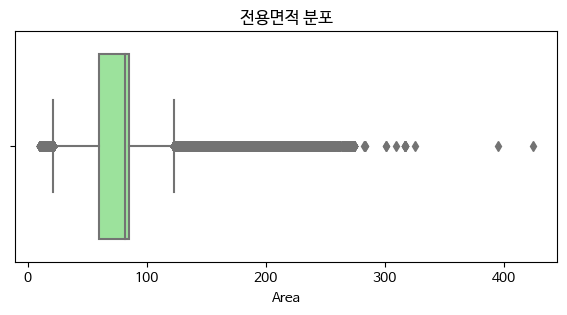

In [27]:
# ÎåÄÌëúÏ†ÅÏù∏ Ïó∞ÏÜçÌòï Î≥ÄÏàòÏù∏ ‚ÄúÏ†ÑÏö© Î©¥Ï†Å‚Äù Î≥ÄÏàò Í¥ÄÎ†®Ìïú Î∂ÑÌè¨Î•º Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat_select, x = 'Ï†ÑÏö©Î©¥Ï†Å', color='lightgreen')
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨')
plt.xlabel('Area')
plt.show()

In [28]:


# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Î∞©Î≤ïÏóêÎäî IQRÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
# Train Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï†ÅÏö©ÌïòÍ≥† Test Îç∞Ïù¥ÌÑ∞Îäî Î≥¥Ï°¥Ìï©ÎãàÎã§.
def remove_outliers_iqr(df, column):
    # train Îç∞Ïù¥ÌÑ∞ÏôÄ test Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
    train_mask = df['is_test'] == 0
    test_mask = df['is_test'] == 1
    
    train_data = df[train_mask].copy()
    test_data = df[test_mask].copy()
    
    print(f"Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ï†Ñ:")
    print(f"  - Train Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {train_data.shape}")
    print(f"  - Test Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {test_data.shape}")
    print(f"  - Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df.shape}")
    
    # train Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎßå Ïù¥ÏÉÅÏπò Í≥ÑÏÇ∞
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"\n{column} Ïª¨Îüº Ïù¥ÏÉÅÏπò Í∏∞Ï§Ä:")
    print(f"  - Q1 (25%): {Q1:.2f}")
    print(f"  - Q3 (75%): {Q3:.2f}")
    print(f"  - IQR: {IQR:.2f}")
    print(f"  - ÌïòÌïúÏÑ†: {lower_bound:.2f}")
    print(f"  - ÏÉÅÌïúÏÑ†: {upper_bound:.2f}")
    
    # train Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎßå Ïù¥ÏÉÅÏπò Ï†úÍ±∞
    outlier_mask = (train_data[column] < lower_bound) | (train_data[column] > upper_bound)
    train_filtered = train_data[~outlier_mask]
    
    # Îç∞Ïù¥ÌÑ∞ Îã§Ïãú Ìï©ÏπòÍ∏∞ (test Îç∞Ïù¥ÌÑ∞Îäî Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ)
    result_df = pd.concat([train_filtered, test_data], ignore_index=True)
    
    print(f"\nÏù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ:")
    print(f"  - Train Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {train_filtered.shape}")
    print(f"  - Test Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {test_data.shape}")
    print(f"  - Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {result_df.shape}")
    print(f"  - Ï†úÍ±∞Îêú Ïù¥ÏÉÅÏπò Í∞úÏàò: {outlier_mask.sum()}Í∞ú")
    
    return result_df

In [29]:
# ÏúÑ Î∞©Î≤ïÏúºÎ°ú Ï†ÑÏö© Î©¥Ï†ÅÏóê ÎåÄÌïú Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat_select = remove_outliers_iqr(concat_select, 'Ï†ÑÏö©Î©¥Ï†Å')

Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ï†Ñ:
  - Train Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1118822, 48)
  - Test Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (9272, 48)
  - Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1128094, 48)

Ï†ÑÏö©Î©¥Ï†Å Ïª¨Îüº Ïù¥ÏÉÅÏπò Í∏∞Ï§Ä:
  - Q1 (25%): 59.65
  - Q3 (75%): 84.96
  - IQR: 25.31
  - ÌïòÌïúÏÑ†: 21.69
  - ÏÉÅÌïúÏÑ†: 122.92

Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ:
  - Train Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1029574, 48)
  - Test Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (9272, 48)
  - Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1038846, 48)
  - Ï†úÍ±∞Îêú Ïù¥ÏÉÅÏπò Í∞úÏàò: 89248Í∞ú


In [30]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÏïΩ 10ÎßåÍ∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†úÍ±∞Îêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
print(concat_select.shape)

(1038846, 48)


In [31]:
concat_select['is_test'].value_counts()     # ÎòêÌïú, train dataÎßå Ï†úÍ±∞ÎêòÏóàÏäµÎãàÎã§.

0    1029574
1       9272
Name: is_test, dtype: int64

## 4. Feature Engineering
- Ïù¥Ï†ú ÌååÏÉùÎ≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
- ÌååÏÉù Î≥ÄÏàòÎäî ÎèÑÎ©îÏù∏ ÏßÄÏãùÏóê Í∏∞Î∞òÌï¥ Ï†úÏûëÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.
- Ï£ºÌÉùÏùò Í∞ÄÍ≤©ÏùÑ ÏòàÏ∏°ÌïòÎäî Î¨∏Ï†úÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏïΩÍ∞ÑÏùò Î∂ÄÎèôÏÇ∞ ÏßÄÏãùÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌååÏÉù Î≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥ Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [32]:
concat_select['ÏãúÍµ∞Íµ¨'].head()

0    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô
1    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô
2    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô
3    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô
4    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô
Name: ÏãúÍµ∞Íµ¨, dtype: object

In [33]:
# ÏßÄÌïòÏ≤†Ïó≠ Îç∞Ïù¥ÌÑ∞ Î°úÎìú
subway_path = "/home/realtheai/documents/upstage-ml-regression-sigma7/subway_feature.csv"
subway_data = pd.read_csv(subway_path)
print(f"ÏßÄÌïòÏ≤†Ïó≠ Îç∞Ïù¥ÌÑ∞: {subway_data.shape}")


ÏßÄÌïòÏ≤†Ïó≠ Îç∞Ïù¥ÌÑ∞: (768, 5)


In [34]:
# Í±∞Î¶¨ Í≥ÑÏÇ∞ Ìï®Ïàò
import math
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    return R * 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))


In [36]:
# ÏßÄÌïòÏ≤† Ï†ëÍ∑ºÏÑ± ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ± (ÎØ∏ÌÑ∞ Îã®ÏúÑÎ°ú ÏàòÏ†ïÎêú Î≤ÑÏ†Ñ)
def add_subway_features(df, subway_df):
    print("ÏßÄÌïòÏ≤† Ï†ëÍ∑ºÏÑ± Î≥ÄÏàò ÏÉùÏÑ± Ï§ë... (ÎØ∏ÌÑ∞ Îã®ÏúÑ Ï∂úÎ†•)")
    
    # Ïú†Ìö®Ìïú Ï¢åÌëúÍ∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
    valid_mask = df[['Ï¢åÌëúY', 'Ï¢åÌëúX']].notna().all(axis=1)
    subway_valid = subway_df[['ÏúÑÎèÑ', 'Í≤ΩÎèÑ']].notna().all(axis=1)
    
    # Í≤∞Í≥º Ïª¨Îüº Ï¥àÍ∏∞Ìôî
    df['subway_min_distance'] = np.nan
    df['nearest_subway_line'] = 'Unknown'
    
    if valid_mask.sum() == 0 or subway_valid.sum() == 0:
        print("Ïú†Ìö®Ìïú Ï¢åÌëú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
        return df
    
    print(f"Ï≤òÎ¶¨Ìï† Î∂ÄÎèôÏÇ∞ Îç∞Ïù¥ÌÑ∞: {valid_mask.sum():,}Í∞ú")
    print(f"ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÏßÄÌïòÏ≤†Ïó≠: {subway_valid.sum()}Í∞ú")
    
    # ÏßÄÌïòÏ≤†Ïó≠ Ï¢åÌëúÏôÄ Ìò∏ÏÑ† Ï†ïÎ≥¥ Ï∂îÏ∂ú
    subway_coords = subway_df[subway_valid][['ÏúÑÎèÑ', 'Í≤ΩÎèÑ']].values
    subway_lines = subway_df[subway_valid]['Ìò∏ÏÑ†'].fillna('Unknown').astype(str).values
    
    # Î∂ÄÎèôÏÇ∞ Ï¢åÌëú Ï∂îÏ∂ú
    property_coords = df[valid_mask][['Ï¢åÌëúY', 'Ï¢åÌëúX']].values
    
    # Î∞∞Ïπò ÌÅ¨Í∏∞ ÏÑ§Ï†ï (Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ Ï†úÌïú)
    batch_size = 5000
    
    for i in range(0, len(property_coords), batch_size):
        end_idx = min(i + batch_size, len(property_coords))
        batch_coords = property_coords[i:end_idx]
        
        # ÌòÑÏû¨ Î∞∞ÏπòÏóê ÎåÄÌïú Ïù∏Îç±Ïä§
        batch_indices = df[valid_mask].index[i:end_idx]
        
        print(f"ÏßÑÌñâÎ•†: {i+len(batch_coords)}/{len(property_coords)} ({((i+len(batch_coords))/len(property_coords)*100):.1f}%)")
        
        # Î≤°ÌÑ∞ÌôîÎêú Í±∞Î¶¨ Í≥ÑÏÇ∞
        # Í∞Å Î∂ÄÎèôÏÇ∞Ïóê ÎåÄÌï¥ Î™®Îì† ÏßÄÌïòÏ≤†Ïó≠Í≥ºÏùò Í±∞Î¶¨Î•º ÌïúÎ≤àÏóê Í≥ÑÏÇ∞
        distances_matrix = np.zeros((len(batch_coords), len(subway_coords)))
        
        for j, (prop_lat, prop_lon) in enumerate(batch_coords):
            # Î™®Îì† ÏßÄÌïòÏ≤†Ïó≠Í≥ºÏùò Í±∞Î¶¨Î•º Î≤°ÌÑ∞ÌôîÎ°ú Í≥ÑÏÇ∞
            lat1_rad = np.radians(prop_lat)
            lon1_rad = np.radians(prop_lon)
            lat2_rad = np.radians(subway_coords[:, 0])
            lon2_rad = np.radians(subway_coords[:, 1])
            
            dlat = lat2_rad - lat1_rad
            dlon = lon2_rad - lon1_rad
            
            a = np.sin(dlat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon/2)**2
            c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
            # ÏàòÏ†ï: 6371.0 * c * 1000 ÏúºÎ°ú Î∞îÎ°ú ÎØ∏ÌÑ∞ Îã®ÏúÑ Í≥ÑÏÇ∞
            distances_matrix[j] = 6371.0 * c * 1000  # km -> m Î≥ÄÌôò
        
        # Í∞Å Î∂ÄÎèôÏÇ∞Ïóê ÎåÄÌï¥ Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÏßÄÌïòÏ≤†Ïó≠ Ï∞æÍ∏∞
        min_indices = np.argmin(distances_matrix, axis=1)
        min_distances = distances_matrix[np.arange(len(batch_coords)), min_indices]
        nearest_lines = subway_lines[min_indices]
        
        # Í≤∞Í≥º Ï†ÄÏû• (Ïù¥ÎØ∏ ÎØ∏ÌÑ∞ Îã®ÏúÑ)
        df.loc[batch_indices, 'subway_min_distance'] = min_distances
        df.loc[batch_indices, 'nearest_subway_line'] = nearest_lines
    
    print("ÏßÄÌïòÏ≤† Ï†ëÍ∑ºÏÑ± Î≥ÄÏàò ÏÉùÏÑ± ÏôÑÎ£å! (ÎØ∏ÌÑ∞ Îã®ÏúÑ)")
    print(f"Í±∞Î¶¨ Î≤îÏúÑ: {df['subway_min_distance'].min():.1f}m ~ {df['subway_min_distance'].max():.1f}m")
    return df

In [37]:
# ÏßÄÌïòÏ≤† Ï†ëÍ∑ºÏÑ± ÌååÏÉù Î≥ÄÏàò Ï†ÅÏö©
concat_select = add_subway_features(concat_select, subway_data)

print(f"ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {concat_select.shape}")
print(f"ÏßÄÌïòÏ≤† Í±∞Î¶¨ - ÌèâÍ∑†: {concat_select['subway_min_distance'].mean():.2f}km")
print("ÏßÄÌïòÏ≤† Ï†ëÍ∑ºÏÑ± ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ± ÏôÑÎ£å!")


ÏßÄÌïòÏ≤† Ï†ëÍ∑ºÏÑ± Î≥ÄÏàò ÏÉùÏÑ± Ï§ë... (ÎØ∏ÌÑ∞ Îã®ÏúÑ Ï∂úÎ†•)
Ï≤òÎ¶¨Ìï† Î∂ÄÎèôÏÇ∞ Îç∞Ïù¥ÌÑ∞: 1,038,846Í∞ú
ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÏßÄÌïòÏ≤†Ïó≠: 768Í∞ú
ÏßÑÌñâÎ•†: 5000/1038846 (0.5%)
ÏßÑÌñâÎ•†: 10000/1038846 (1.0%)
ÏßÑÌñâÎ•†: 15000/1038846 (1.4%)
ÏßÑÌñâÎ•†: 20000/1038846 (1.9%)
ÏßÑÌñâÎ•†: 25000/1038846 (2.4%)
ÏßÑÌñâÎ•†: 30000/1038846 (2.9%)
ÏßÑÌñâÎ•†: 35000/1038846 (3.4%)
ÏßÑÌñâÎ•†: 40000/1038846 (3.9%)
ÏßÑÌñâÎ•†: 45000/1038846 (4.3%)
ÏßÑÌñâÎ•†: 50000/1038846 (4.8%)
ÏßÑÌñâÎ•†: 55000/1038846 (5.3%)
ÏßÑÌñâÎ•†: 60000/1038846 (5.8%)
ÏßÑÌñâÎ•†: 65000/1038846 (6.3%)
ÏßÑÌñâÎ•†: 70000/1038846 (6.7%)
ÏßÑÌñâÎ•†: 75000/1038846 (7.2%)
ÏßÑÌñâÎ•†: 80000/1038846 (7.7%)
ÏßÑÌñâÎ•†: 85000/1038846 (8.2%)
ÏßÑÌñâÎ•†: 90000/1038846 (8.7%)
ÏßÑÌñâÎ•†: 95000/1038846 (9.1%)
ÏßÑÌñâÎ•†: 100000/1038846 (9.6%)
ÏßÑÌñâÎ•†: 105000/1038846 (10.1%)
ÏßÑÌñâÎ•†: 110000/1038846 (10.6%)
ÏßÑÌñâÎ•†: 115000/1038846 (11.1%)
ÏßÑÌñâÎ•†: 120000/1038846 (11.6%)
ÏßÑÌñâÎ•†: 125000/1038846 (12.0%)
ÏßÑÌñâÎ•†: 130000/1038846 (12.5%)
ÏßÑÌñâÎ•†:

In [38]:
concat_select['Í≥ÑÏïΩÎÖÑÏõî'].head()

0    201712
1    201712
2    201712
3    201801
4    201801
Name: Í≥ÑÏïΩÎÖÑÏõî, dtype: int64

In [39]:
# ÏãúÍµ∞Íµ¨, ÎÖÑÏõî Îì± Î∂ÑÌï†Ìï† Ïàò ÏûàÎäî Î≥ÄÏàòÎì§ÏùÄ ÏÑ∏Î∂ÄÏÇ¨Ìï≠ Í≥†Î†§Î•º Ïö©Ïù¥ÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ Î™®Îëê Î∂ÑÌï†Ìï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat_select['Íµ¨'] = concat_select['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[1])
concat_select['Îèô'] = concat_select['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[2])
del concat_select['ÏãúÍµ∞Íµ¨']

concat_select['Í≥ÑÏïΩÎÖÑ'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[:4])
concat_select['Í≥ÑÏïΩÏõî'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[4:])
del concat_select['Í≥ÑÏïΩÎÖÑÏõî']

In [40]:
concat_select.columns

Index(['Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê',
       'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏',
       'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò',
       'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å',
       'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)',
       'k-85„é°~135„é°Ïù¥Ìïò', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',
       'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú',
       'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº'

- ÏÑúÏö∏Ïùò ÏßëÍ∞íÏùÄ Í∞ïÎÇ®, Í∞ïÎ∂Å Ïó¨Î∂ÄÏóê Îî∞Îùº Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇúÎã§Îäî ÏÇ¨Ïã§ÏùÄ ÎßéÏù¥ ÏïåÎ†§ÏßÑ ÏÇ¨Ïã§ÏûÖÎãàÎã§.
- Îî∞ÎùºÏÑú Í∞ïÎÇ®/Í∞ïÎ∂ÅÏùò Ïó¨Î∂ÄÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [41]:
all = list(concat_select['Íµ¨'].unique())
gangnam = ['Í∞ïÏÑúÍµ¨', 'ÏòÅÎì±Ìè¨Íµ¨', 'ÎèôÏûëÍµ¨', 'ÏÑúÏ¥àÍµ¨', 'Í∞ïÎÇ®Íµ¨', 'ÏÜ°ÌååÍµ¨', 'Í∞ïÎèôÍµ¨']
gangbuk = [x for x in all if x not in gangnam]

assert len(all) == len(gangnam) + len(gangbuk)       # ÏïåÎßûÍ≤å Î∂ÑÎ¶¨ÎêòÏóàÎäîÏßÄ Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.

In [42]:
# Í∞ïÎÇ®Ïùò Ïó¨Î∂ÄÎ•º Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.
is_gangnam = []
for x in concat_select['Íµ¨'].tolist() :
  if x in gangnam :
    is_gangnam.append(1)
  else :
    is_gangnam.append(0)

# ÌååÏÉùÎ≥ÄÏàòÎ•º ÌïòÎÇò ÎßåÎ¶ÖÎãàÎã§.
concat_select['Í∞ïÎÇ®Ïó¨Î∂Ä'] = is_gangnam

In [43]:
concat_select[['subway_min_distance', 'nearest_subway_line']]

subway_min_distance nearest_subway_line
0                1129.774800                 Î∂ÑÎãπÏÑ†
1                1129.774800                 Î∂ÑÎãπÏÑ†
2                1129.774800                 Î∂ÑÎãπÏÑ†
3                1129.774800                 Î∂ÑÎãπÏÑ†
4                1129.774800                 Î∂ÑÎãπÏÑ†
...                      ...                 ...
1038841           733.290902                 Í≤ΩÏ∂òÏÑ†
1038842           733.290902                 Í≤ΩÏ∂òÏÑ†
1038843           733.290902                 Í≤ΩÏ∂òÏÑ†
1038844           733.290902                 Í≤ΩÏ∂òÏÑ†
1038845           733.290902                 Í≤ΩÏ∂òÏÑ†

[1038846 rows x 2 columns]

In [44]:
def add_line_grade(df):
    """Ìò∏ÏÑ†Î≥Ñ Îì±Í∏â Ï†êÏàò Ï∂îÍ∞Ä (2023ÎÖÑ 6Ïõî Í∏∞Ï§Ä)"""
    
    # Ìò∏ÏÑ†Î≥Ñ Îì±Í∏â Îß§Ìïë
    line_grade_map = {
        # SÍ∏â = 5Ï†ê
        "Ïã†Î∂ÑÎãπÏÑ†": 5, "Ïã†Î∂ÑÎãπÏÑ†(Ïó∞Ïû•)": 5, "Ïã†Î∂ÑÎãπÏÑ†(Ïó∞Ïû•2)": 5, "3Ìò∏ÏÑ†": 5,
        # AÍ∏â = 4Ï†ê  
        "2Ìò∏ÏÑ†": 4, "7Ìò∏ÏÑ†": 4, "Î∂ÑÎãπÏÑ†": 4, "9Ìò∏ÏÑ†": 4,
        # BÍ∏â = 3Ï†ê
        "1Ìò∏ÏÑ†": 3, "4Ìò∏ÏÑ†": 3, "5Ìò∏ÏÑ†": 3, "6Ìò∏ÏÑ†": 3, "8Ìò∏ÏÑ†": 3, "9Ìò∏ÏÑ†(Ïó∞Ïû•)": 3,
        # CÍ∏â = 2Ï†ê
        "Ï§ëÏïôÏÑ†": 2, "Í≤ΩÏùòÏ§ëÏïôÏÑ†": 2, "Í≤ΩÏ∂òÏÑ†": 2, "Í≤ΩÏõêÏÑ†": 2, "Í≤ΩÏù∏ÏÑ†": 2, "ÏùºÏÇ∞ÏÑ†": 2,
        "Í≥ºÏ≤úÏÑ†": 2, "ÏïàÏÇ∞ÏÑ†": 2, "ÏàòÏù∏ÏÑ†": 2, "Ïù∏Ï≤ú1Ìò∏ÏÑ†": 2, "Ïù∏Ï≤ú2Ìò∏ÏÑ†": 2, 
        "7Ìò∏ÏÑ†(Ïù∏Ï≤ú)": 2, "Í≥µÌï≠Ï≤†ÎèÑ1Ìò∏ÏÑ†": 2, "Ïö∞Ïù¥Ïã†ÏÑ§ÏÑ†": 2, "Ïã†Î¶ºÏÑ†": 2,
        # DÍ∏â = 1Ï†ê
        "ÏóêÎ≤ÑÎùºÏù∏ÏÑ†": 1, "ÏùòÏ†ïÎ∂ÄÏÑ†": 1, "Í≤ΩÎ∂ÄÏÑ†": 1, "ÏÑúÌï¥ÏÑ†": 1, "Í≤ΩÍ∞ïÏÑ†": 1,
        "ÍπÄÌè¨Í≥®ÎìúÎùºÏù∏": 1, "Ïû•Ìï≠ÏÑ†": 1, "ÏßÑÏ†ëÏÑ†": 1
    }
    
    # Ìò∏ÏÑ† Îì±Í∏â Ïª¨Îüº Ï∂îÍ∞Ä
    df['Ìò∏ÏÑ†Îì±Í∏â'] = df['nearest_subway_line'].map(line_grade_map).fillna(0)
    
    print(f"Ìò∏ÏÑ† Îì±Í∏â Ï∂îÍ∞Ä ÏôÑÎ£å! (ÌèâÍ∑†: {df['Ìò∏ÏÑ†Îì±Í∏â'].mean():.2f}Ï†ê)")
    return df

# Ìò∏ÏÑ†Îì±Í∏â Ïª¨Îüº Ï∂îÍ∞Ä
concat_select = add_line_grade(concat_select)

Ìò∏ÏÑ† Îì±Í∏â Ï∂îÍ∞Ä ÏôÑÎ£å! (ÌèâÍ∑†: 3.39Ï†ê)


In [45]:
concat_select['Ìò∏ÏÑ†Îì±Í∏â'] if 'Ìò∏ÏÑ†Îì±Í∏â' in concat_select.columns else print("Ìò∏ÏÑ†Îì±Í∏â Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§")

0          4
1          4
2          4
3          4
4          4
          ..
1038841    2
1038842    2
1038843    2
1038844    2
1038845    2
Name: Ìò∏ÏÑ†Îì±Í∏â, Length: 1038846, dtype: int64

In [46]:

def add_station_area_grade(df):
    """
    ÏßÄÌïòÏ≤†Ïó≠ÍπåÏßÄÏùò ÏµúÎã®Í±∞Î¶¨Î•º Ïó≠ÏÑ∏Í∂å Îì±Í∏âÏúºÎ°ú Î∂ÑÎ•ò
    - SÍ∏â (Ï¥àÏó≠ÏÑ∏Í∂å): 250m Ïù¥Ìïò - 5Ï†ê
    - AÍ∏â (1Ï∞® Ïó≠ÏÑ∏Í∂å): 250m Ï¥àÍ≥º ~ 500m Ïù¥Ìïò - 4Ï†ê 
    - BÍ∏â (2Ï∞® Ïó≠ÏÑ∏Í∂å): 500m Ï¥àÍ≥º ~ 800m Ïù¥Ìïò - 3Ï†ê
    - CÍ∏â (Í∞ÑÏ†ë Ïó≠ÏÑ∏Í∂å): 800m Ï¥àÍ≥º ~ 1200m Ïù¥Ìïò - 2Ï†ê
    - DÍ∏â (ÎπÑÏó≠ÏÑ∏Í∂å): 1200m Ï¥àÍ≥º - 1Ï†ê
    """
    if 'subway_min_distance' not in df.columns:
        print("subway_min_distance Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")
        return df
    
    # Ïó≠ÏÑ∏Í∂å Ïª¨Îüº Ï¥àÍ∏∞Ìôî
    df['Ïó≠ÏÑ∏Í∂å'] = 1  # Í∏∞Î≥∏Í∞í 1Ï†ê (DÍ∏â - ÎπÑÏó≠ÏÑ∏Í∂å)
    
    # Îì±Í∏â Î∂ÑÎ•ò
    df.loc[df['subway_min_distance'] <= 250, 'Ïó≠ÏÑ∏Í∂å'] = 5   # SÍ∏â: 250m Ïù¥Ìïò
    df.loc[(df['subway_min_distance'] > 250) & (df['subway_min_distance'] <= 500), 'Ïó≠ÏÑ∏Í∂å'] = 4   # AÍ∏â: 250m~500m
    df.loc[(df['subway_min_distance'] > 500) & (df['subway_min_distance'] <= 800), 'Ïó≠ÏÑ∏Í∂å'] = 3   # BÍ∏â: 500m~800m
    df.loc[(df['subway_min_distance'] > 800) & (df['subway_min_distance'] <= 1200), 'Ïó≠ÏÑ∏Í∂å'] = 2  # CÍ∏â: 800m~1200m
    # 1200m Ï¥àÍ≥ºÎäî Ïù¥ÎØ∏ 1Ï†ê(DÍ∏â)ÏúºÎ°ú ÏÑ§Ï†ïÎê®
    
    print("Ïó≠ÏÑ∏Í∂å Îì±Í∏â Î∂ÑÎ•ò ÏôÑÎ£å!")
    return df

# Ìï®Ïàò Ï†ÅÏö©
concat_select = add_station_area_grade(concat_select)

# Í≤∞Í≥º ÌôïÏù∏
print("\n=== Ïó≠ÏÑ∏Í∂å Îì±Í∏â Î∂ÑÌè¨ ===")
grade_counts = concat_select['Ïó≠ÏÑ∏Í∂å'].value_counts().sort_index()
grade_labels = {5: 'SÍ∏â(Ï¥àÏó≠ÏÑ∏Í∂å)', 4: 'AÍ∏â(1Ï∞®Ïó≠ÏÑ∏Í∂å)', 3: 'BÍ∏â(2Ï∞®Ïó≠ÏÑ∏Í∂å)', 2: 'CÍ∏â(Í∞ÑÏ†ëÏó≠ÏÑ∏Í∂å)', 1: 'DÍ∏â(ÎπÑÏó≠ÏÑ∏Í∂å)'}

for grade in sorted(grade_counts.index):
    count = grade_counts[grade]
    percentage = (count / len(concat_select)) * 100
    print(f"{grade}Ï†ê - {grade_labels[grade]}: {count:,}Í∞ú ({percentage:.1f}%)")

# Îì±Í∏âÎ≥Ñ Í±∞Î¶¨ ÌÜµÍ≥Ñ
print("\n=== Îì±Í∏âÎ≥Ñ Í±∞Î¶¨ ÌÜµÍ≥Ñ ===")
distance_stats = concat_select.groupby('Ïó≠ÏÑ∏Í∂å')['subway_min_distance'].agg(['count', 'min', 'max', 'mean']).round(1)
distance_stats.index = [f"{idx}Ï†ê({grade_labels[idx]})" for idx in distance_stats.index]
print(distance_stats)

Ïó≠ÏÑ∏Í∂å Îì±Í∏â Î∂ÑÎ•ò ÏôÑÎ£å!

=== Ïó≠ÏÑ∏Í∂å Îì±Í∏â Î∂ÑÌè¨ ===
1Ï†ê - DÍ∏â(ÎπÑÏó≠ÏÑ∏Í∂å): 34,564Í∞ú (3.3%)
2Ï†ê - CÍ∏â(Í∞ÑÏ†ëÏó≠ÏÑ∏Í∂å): 117,248Í∞ú (11.3%)
3Ï†ê - BÍ∏â(2Ï∞®Ïó≠ÏÑ∏Í∂å): 300,467Í∞ú (28.9%)
4Ï†ê - AÍ∏â(1Ï∞®Ïó≠ÏÑ∏Í∂å): 487,495Í∞ú (46.9%)
5Ï†ê - SÍ∏â(Ï¥àÏó≠ÏÑ∏Í∂å): 99,072Í∞ú (9.5%)

=== Îì±Í∏âÎ≥Ñ Í±∞Î¶¨ ÌÜµÍ≥Ñ ===
                count     min     max    mean
1Ï†ê(DÍ∏â(ÎπÑÏó≠ÏÑ∏Í∂å))    34564  1208.4  2510.7  1442.2
2Ï†ê(CÍ∏â(Í∞ÑÏ†ëÏó≠ÏÑ∏Í∂å))  117248   800.6  1194.9   962.2
3Ï†ê(BÍ∏â(2Ï∞®Ïó≠ÏÑ∏Í∂å))  300467   500.4   793.6   636.9
4Ï†ê(AÍ∏â(1Ï∞®Ïó≠ÏÑ∏Í∂å))  487495   250.3   498.2   379.5
5Ï†ê(SÍ∏â(Ï¥àÏó≠ÏÑ∏Í∂å))    99072    36.2   248.8   184.6


In [47]:
concat_select['Ïó≠ÏÑ∏Í∂å']

0          2
1          2
2          2
3          2
4          2
          ..
1038841    3
1038842    3
1038843    3
1038844    3
1038845    3
Name: Ïó≠ÏÑ∏Í∂å, Length: 1038846, dtype: int64

In [48]:
concat_select.columns

Index(['Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê',
       'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏',
       'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò',
       'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å',
       'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)',
       'k-85„é°~135„é°Ïù¥Ìïò', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',
       'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú',
       'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº'

- ÎòêÌïú Ïã†Ï∂ïÏù∏ÏßÄ, Íµ¨Ï∂ïÏù∏ÏßÄÏùò Ïó¨Î∂ÄÎèÑ Ïã§Í±∞ÎûòÍ∞ÄÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú Í±¥Ï∂ïÎÖÑÎèÑÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º Ï†úÏûëÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [49]:
# Í±¥Ï∂ïÎÖÑÎèÑ Î∂ÑÌè¨Îäî ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÌäπÌûà 2005ÎÖÑÏù¥ Q3Ïóê Ìï¥ÎãπÌï©ÎãàÎã§.
# 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥ÏßÑ Í±¥Î¨ºÏùÄ 10%Ï†ïÎèÑ ÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9])

count    1.038846e+06
mean     1.998583e+03
std      9.132471e+00
min      1.961000e+03
10%      1.987000e+03
25%      1.992000e+03
50%      2.000000e+03
75%      2.005000e+03
80%      2.006000e+03
90%      2.009000e+03
max      2.023000e+03
Name: Í±¥Ï∂ïÎÖÑÎèÑ, dtype: float64

In [50]:
# Îî∞ÎùºÏÑú 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥Ï°åÏúºÎ©¥ ÎπÑÍµêÏ†Å Ïã†Ï∂ïÏù¥ÎùºÍ≥† ÌåêÎã®ÌïòÍ≥†, Ïã†Ï∂ï Ïó¨Î∂Ä Î≥ÄÏàòÎ•º Ï†úÏûëÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
concat_select['Ïã†Ï∂ïÏó¨Î∂Ä'] = concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].apply(lambda x: 1 if x >= 2009 else 0)

In [51]:


# üöÄ Ï¥àÍ≥†ÏÜç ÌïôÏóÖÏÑ±Í≥º Feature ÏÉùÏÑ± Ìï®Ïàò (Î≤°ÌÑ∞Ìôî ÏµúÏ†ÅÌôî) - 10Í∞ú Feature Î≤ÑÏ†Ñ
def add_school_features_fast(df, school_df):
    """
    ÌïôÍµê Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú ÌïôÏóÖÏÑ±Í≥º Í¥ÄÎ†® Feature ÏÉùÏÑ± (Ï¥àÍ≥†ÏÜç Î≤ÑÏ†Ñ)
    10Í∞ú Feature: Í±∞Î¶¨(2) + Ï†êÏàò(2) + Îì±Í∏â(2) + 1kmÎÇ¥Í∞úÏàò(1) + 1kmÎÇ¥ÌèâÍ∑†Ï†êÏàò(1) + ÏßÑÌïôÎ•†(2)
    """
    print("üöÄ Ï¥àÍ≥†ÏÜç ÌïôÏóÖÏÑ±Í≥º Feature ÏÉùÏÑ± Ï§ë... (10Í∞ú Feature)")
    
    # Ïú†Ìö®Ìïú Ï¢åÌëúÍ∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
    valid_mask = df[['Ï¢åÌëúY', 'Ï¢åÌëúX']].notna().all(axis=1)
    school_valid = school_df[['ÏúÑÎèÑ', 'Í≤ΩÎèÑ']].notna().all(axis=1)
    
    # Í≤∞Í≥º Ïª¨Îüº Ï¥àÍ∏∞Ìôî (10Í∞ú Feature)
    feature_columns = [
        'nearest_middle_distance_m', 'nearest_high_distance_m',
        'nearest_middle_score', 'nearest_high_score',
        'nearest_middle_grade', 'nearest_high_grade',
        'schools_within_1km', 'avg_school_score_1km',
        'nearest_middle_ÏßÑÌïôÎ•†', 'nearest_high_ÏßÑÌïôÎ•†'
    ]
    
    for col in feature_columns:
        df[col] = np.nan
    
    if valid_mask.sum() == 0 or school_valid.sum() == 0:
        print("Ïú†Ìö®Ìïú Ï¢åÌëú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
        return df
    
    # ÌïôÍµê Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
    school_clean = school_df[school_valid].copy()
    middle_schools = school_clean[school_clean['ÌïôÍµêÏú†Ìòï'] == 'Ï§ëÌïôÍµê'].copy()
    high_schools = school_clean[school_clean['ÌïôÍµêÏú†Ìòï'] == 'Í≥†Îì±ÌïôÍµê'].copy()
    
    print(f"Ï§ëÌïôÍµê: {len(middle_schools)}Í∞ú, Í≥†Îì±ÌïôÍµê: {len(high_schools)}Í∞ú")
    
    # ÌïôÍµê Îì±Í∏â Í≥ÑÏÇ∞
    def calculate_grades_fast(schools_df):
        scores = schools_df['ÌèâÍ∑†'].dropna()
        if len(scores) == 0:
            return np.full(len(schools_df), np.nan)
        
        # Î∞±Î∂ÑÏúÑ Í≥ÑÏÇ∞
        thresholds = np.percentile(scores, [20, 50, 80, 90])
        
        grades = np.ones(len(schools_df))  # Í∏∞Î≥∏Í∞í 1
        valid_scores = schools_df['ÌèâÍ∑†'].notna()
        
        grades[valid_scores & (schools_df['ÌèâÍ∑†'] >= thresholds[3])] = 5  # ÏÉÅÏúÑ 10%
        grades[valid_scores & (schools_df['ÌèâÍ∑†'] >= thresholds[2]) & (schools_df['ÌèâÍ∑†'] < thresholds[3])] = 4  # ÏÉÅÏúÑ 20%
        grades[valid_scores & (schools_df['ÌèâÍ∑†'] >= thresholds[1]) & (schools_df['ÌèâÍ∑†'] < thresholds[2])] = 3  # ÏÉÅÏúÑ 50%
        grades[valid_scores & (schools_df['ÌèâÍ∑†'] >= thresholds[0]) & (schools_df['ÌèâÍ∑†'] < thresholds[1])] = 2  # ÏÉÅÏúÑ 80%
        
        grades[~valid_scores] = np.nan
        return grades
    
    if len(middle_schools) > 0:
        middle_schools['Îì±Í∏â'] = calculate_grades_fast(middle_schools)
    if len(high_schools) > 0:
        high_schools['Îì±Í∏â'] = calculate_grades_fast(high_schools)
    
    # üöÄ Ï¥àÍ≥†ÏÜç Î≤°ÌÑ∞Ìôî Í±∞Î¶¨ Í≥ÑÏÇ∞
    def calculate_distances_vectorized(prop_coords, school_coords):
        """ÏôÑÏ†Ñ Î≤°ÌÑ∞ÌôîÎêú Í±∞Î¶¨ Í≥ÑÏÇ∞"""
        # Ï¢åÌëúÎ•º ÎùºÎîîÏïàÏúºÎ°ú Î≥ÄÌôò
        prop_lat_rad = np.radians(prop_coords[:, 0])
        prop_lon_rad = np.radians(prop_coords[:, 1])
        school_lat_rad = np.radians(school_coords[:, 0])
        school_lon_rad = np.radians(school_coords[:, 1])
        
        # Î∏åÎ°úÎìúÏ∫êÏä§ÌåÖÏùÑ ÏúÑÌïú Ï∞®Ïõê ÌôïÏû•
        prop_lat_rad = prop_lat_rad[:, np.newaxis]
        prop_lon_rad = prop_lon_rad[:, np.newaxis]
        
        # ÌïòÎ≤ÑÏÇ¨Ïù∏ Í≥µÏãù Î≤°ÌÑ∞Ìôî
        dlat = school_lat_rad - prop_lat_rad
        dlon = school_lon_rad - prop_lon_rad
        
        a = np.sin(dlat/2)**2 + np.cos(prop_lat_rad) * np.cos(school_lat_rad) * np.sin(dlon/2)**2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
        distances = 6371000 * c  # ÎØ∏ÌÑ∞ Îã®ÏúÑ
        
        return distances
    
    # Ïú†Ìö®Ìïú Î∂ÄÎèôÏÇ∞ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    valid_properties = df[valid_mask].copy()
    prop_coords = valid_properties[['Ï¢åÌëúY', 'Ï¢åÌëúX']].values
    
    print(f"Ï≤òÎ¶¨Ìï† Î∂ÄÎèôÏÇ∞: {len(prop_coords):,}Í∞ú")
    
    # üöÄ ÎåÄÏö©Îüâ Î∞∞Ïπò Ï≤òÎ¶¨ (5000Í∞úÏî©)
    batch_size = 5000
    
    for i in range(0, len(prop_coords), batch_size):
        end_idx = min(i + batch_size, len(prop_coords))
        batch_coords = prop_coords[i:end_idx]
        batch_indices = valid_properties.index[i:end_idx]
        
        print(f"üöÄ ÏßÑÌñâÎ•†: {end_idx}/{len(prop_coords)} ({end_idx/len(prop_coords)*100:.1f}%)")
        
        # Ï§ëÌïôÍµê Ï≤òÎ¶¨
        if len(middle_schools) > 0:
            middle_coords = middle_schools[['ÏúÑÎèÑ', 'Í≤ΩÎèÑ']].values
            middle_distances = calculate_distances_vectorized(batch_coords, middle_coords)
            
            # Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ï§ëÌïôÍµê Ï∞æÍ∏∞
            nearest_middle_indices = np.argmin(middle_distances, axis=1)
            nearest_middle_distances = middle_distances[np.arange(len(batch_coords)), nearest_middle_indices]
            
            # Í≤∞Í≥º Ï†ÄÏû• (10Í∞ú Feature Î≤ÑÏ†Ñ)
            df.loc[batch_indices, 'nearest_middle_distance_m'] = nearest_middle_distances
            df.loc[batch_indices, 'nearest_middle_score'] = middle_schools.iloc[nearest_middle_indices]['ÌèâÍ∑†'].values
            df.loc[batch_indices, 'nearest_middle_grade'] = middle_schools.iloc[nearest_middle_indices]['Îì±Í∏â'].values
            
            # ÏßÑÌïôÎ•† Ï≤òÎ¶¨
            ÏßÑÌïôÎ•†_values = middle_schools.iloc[nearest_middle_indices]['ÌäπÎ™©Í≥†ÏßÑÌïôÎ•†'].fillna(0).values
            df.loc[batch_indices, 'nearest_middle_ÏßÑÌïôÎ•†'] = ÏßÑÌïôÎ•†_values
        
        # Í≥†Îì±ÌïôÍµê Ï≤òÎ¶¨
        if len(high_schools) > 0:
            high_coords = high_schools[['ÏúÑÎèÑ', 'Í≤ΩÎèÑ']].values
            high_distances = calculate_distances_vectorized(batch_coords, high_coords)
            
            # Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í≥†Îì±ÌïôÍµê Ï∞æÍ∏∞
            nearest_high_indices = np.argmin(high_distances, axis=1)
            nearest_high_distances = high_distances[np.arange(len(batch_coords)), nearest_high_indices]
            
            # Í≤∞Í≥º Ï†ÄÏû• (10Í∞ú Feature Î≤ÑÏ†Ñ)
            df.loc[batch_indices, 'nearest_high_distance_m'] = nearest_high_distances
            df.loc[batch_indices, 'nearest_high_score'] = high_schools.iloc[nearest_high_indices]['ÌèâÍ∑†'].values
            df.loc[batch_indices, 'nearest_high_grade'] = high_schools.iloc[nearest_high_indices]['Îì±Í∏â'].values
            
            # ÏßÑÌïôÎ•† Ï≤òÎ¶¨
            ÏßÑÌïôÎ•†_values = high_schools.iloc[nearest_high_indices]['ÎåÄÌïôÍµêÏßÑÌïôÎ•†'].fillna(0).values
            df.loc[batch_indices, 'nearest_high_ÏßÑÌïôÎ•†'] = ÏßÑÌïôÎ•†_values
        
        # 1km ÎÇ¥ ÌïôÍµê Í∞úÏàò Î∞è ÌèâÍ∑† Ï†êÏàò (Í∞ÑÏÜåÌôî)
        all_schools = pd.concat([middle_schools, high_schools]) if len(middle_schools) > 0 and len(high_schools) > 0 else (middle_schools if len(middle_schools) > 0 else high_schools)
        
        if len(all_schools) > 0:
            all_coords = all_schools[['ÏúÑÎèÑ', 'Í≤ΩÎèÑ']].values
            all_distances = calculate_distances_vectorized(batch_coords, all_coords)
            
            # 1km ÎÇ¥ ÌïôÍµê Í∞úÏàò
            within_1km = (all_distances <= 1000).sum(axis=1)
            df.loc[batch_indices, 'schools_within_1km'] = within_1km
            
            # 1km ÎÇ¥ ÌèâÍ∑† Ï†êÏàò
            for j, idx in enumerate(batch_indices):
                within_1km_mask = all_distances[j] <= 1000
                if within_1km_mask.any():
                    nearby_scores = all_schools.iloc[within_1km_mask]['ÌèâÍ∑†'].dropna()
                    df.loc[idx, 'avg_school_score_1km'] = nearby_scores.mean() if len(nearby_scores) > 0 else np.nan
    
    print("üöÄ Ï¥àÍ≥†ÏÜç ÌïôÏóÖÏÑ±Í≥º Feature ÏÉùÏÑ± ÏôÑÎ£å! (10Í∞ú Feature)")
    print("ÏÉùÏÑ±Îêú Feature:")
    for col in feature_columns:
        non_null_count = df[col].count()
        print(f"  - {col}: {non_null_count:,}Í∞ú Îç∞Ïù¥ÌÑ∞")
    
    return df

print("üöÄ Ï¥àÍ≥†ÏÜç ÌïôÏóÖÏÑ±Í≥º Feature Ìï®Ïàò Ï†ïÏùò ÏôÑÎ£å! (10Í∞ú Feature Î≤ÑÏ†Ñ)")
print("ÏÇ¨Ïö©Î≤ï: concat_select = add_school_features_fast(concat_select, school_df)")
print("ÏÉùÏÑ±ÎêòÎäî 10Í∞ú Feature:")
print("  1. nearest_middle_distance_m - Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ï§ëÌïôÍµê Í±∞Î¶¨(ÎØ∏ÌÑ∞)")
print("  2. nearest_high_distance_m - Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í≥†Îì±ÌïôÍµê Í±∞Î¶¨(ÎØ∏ÌÑ∞)")
print("  3. nearest_middle_score - Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ï§ëÌïôÍµê ÌèâÍ∑† Ï†êÏàò")
print("  4. nearest_high_score - Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í≥†Îì±ÌïôÍµê ÌèâÍ∑† Ï†êÏàò")
print("  5. nearest_middle_grade - Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ï§ëÌïôÍµê Îì±Í∏â (1-5)")
print("  6. nearest_high_grade - Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í≥†Îì±ÌïôÍµê Îì±Í∏â (1-5)")
print("  7. schools_within_1km - Î∞òÍ≤Ω 1km ÎÇ¥ ÌïôÍµê Í∞úÏàò")
print("  8. avg_school_score_1km - Î∞òÍ≤Ω 1km ÎÇ¥ ÌèâÍ∑† ÌïôÍµê Ï†êÏàò")
print("  9. nearest_middle_ÏßÑÌïôÎ•† - Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ï§ëÌïôÍµê ÌäπÎ™©Í≥† ÏßÑÌïôÎ•†")
print(" 10. nearest_high_ÏßÑÌïôÎ•† - Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í≥†Îì±ÌïôÍµê ÎåÄÌïô ÏßÑÌïôÎ•†")

üöÄ Ï¥àÍ≥†ÏÜç ÌïôÏóÖÏÑ±Í≥º Feature Ìï®Ïàò Ï†ïÏùò ÏôÑÎ£å! (10Í∞ú Feature Î≤ÑÏ†Ñ)
ÏÇ¨Ïö©Î≤ï: concat_select = add_school_features_fast(concat_select, school_df)
ÏÉùÏÑ±ÎêòÎäî 10Í∞ú Feature:
  1. nearest_middle_distance_m - Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ï§ëÌïôÍµê Í±∞Î¶¨(ÎØ∏ÌÑ∞)
  2. nearest_high_distance_m - Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í≥†Îì±ÌïôÍµê Í±∞Î¶¨(ÎØ∏ÌÑ∞)
  3. nearest_middle_score - Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ï§ëÌïôÍµê ÌèâÍ∑† Ï†êÏàò
  4. nearest_high_score - Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í≥†Îì±ÌïôÍµê ÌèâÍ∑† Ï†êÏàò
  5. nearest_middle_grade - Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ï§ëÌïôÍµê Îì±Í∏â (1-5)
  6. nearest_high_grade - Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í≥†Îì±ÌïôÍµê Îì±Í∏â (1-5)
  7. schools_within_1km - Î∞òÍ≤Ω 1km ÎÇ¥ ÌïôÍµê Í∞úÏàò
  8. avg_school_score_1km - Î∞òÍ≤Ω 1km ÎÇ¥ ÌèâÍ∑† ÌïôÍµê Ï†êÏàò
  9. nearest_middle_ÏßÑÌïôÎ•† - Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ï§ëÌïôÍµê ÌäπÎ™©Í≥† ÏßÑÌïôÎ•†
 10. nearest_high_ÏßÑÌïôÎ•† - Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í≥†Îì±ÌïôÍµê ÎåÄÌïô ÏßÑÌïôÎ•†


In [52]:
# 1. ÌïôÍµê Îç∞Ïù¥ÌÑ∞ Î°úÎìú
school_df = pd.read_csv('/home/realtheai/documents/upstage-ml-regression-sigma7/school_levels.csv')

# 2. Feature ÏÉùÏÑ±
concat_select = add_school_features_fast(concat_select, school_df)

üöÄ Ï¥àÍ≥†ÏÜç ÌïôÏóÖÏÑ±Í≥º Feature ÏÉùÏÑ± Ï§ë... (10Í∞ú Feature)
Ï§ëÌïôÍµê: 379Í∞ú, Í≥†Îì±ÌïôÍµê: 237Í∞ú
Ï≤òÎ¶¨Ìï† Î∂ÄÎèôÏÇ∞: 1,038,846Í∞ú
üöÄ ÏßÑÌñâÎ•†: 5000/1038846 (0.5%)
üöÄ ÏßÑÌñâÎ•†: 10000/1038846 (1.0%)
üöÄ ÏßÑÌñâÎ•†: 15000/1038846 (1.4%)
üöÄ ÏßÑÌñâÎ•†: 20000/1038846 (1.9%)
üöÄ ÏßÑÌñâÎ•†: 25000/1038846 (2.4%)
üöÄ ÏßÑÌñâÎ•†: 30000/1038846 (2.9%)
üöÄ ÏßÑÌñâÎ•†: 35000/1038846 (3.4%)
üöÄ ÏßÑÌñâÎ•†: 40000/1038846 (3.9%)
üöÄ ÏßÑÌñâÎ•†: 45000/1038846 (4.3%)
üöÄ ÏßÑÌñâÎ•†: 50000/1038846 (4.8%)
üöÄ ÏßÑÌñâÎ•†: 55000/1038846 (5.3%)
üöÄ ÏßÑÌñâÎ•†: 60000/1038846 (5.8%)
üöÄ ÏßÑÌñâÎ•†: 65000/1038846 (6.3%)
üöÄ ÏßÑÌñâÎ•†: 70000/1038846 (6.7%)
üöÄ ÏßÑÌñâÎ•†: 75000/1038846 (7.2%)
üöÄ ÏßÑÌñâÎ•†: 80000/1038846 (7.7%)
üöÄ ÏßÑÌñâÎ•†: 85000/1038846 (8.2%)
üöÄ ÏßÑÌñâÎ•†: 90000/1038846 (8.7%)
üöÄ ÏßÑÌñâÎ•†: 95000/1038846 (9.1%)
üöÄ ÏßÑÌñâÎ•†: 100000/1038846 (9.6%)
üöÄ ÏßÑÌñâÎ•†: 105000/1038846 (10.1%)
üöÄ ÏßÑÌñâÎ•†: 110000/1038846 (10.6%)
üöÄ ÏßÑÌñâÎ•†: 115000/1038846 (11.1%)
üö

In [53]:
# 1. ÌïúÍ∞ï Ï†ëÍ∑ºÏÑ± ÌèâÍ∞ÄÏ†êÏàò (0-100Ï†ê)
hangang_df = pd.read_csv('/home/realtheai/documents/upstage-ml-regression-sigma7/3_ÏÑúÏö∏Ïãú ÏïÑÌååÌä∏Î≥Ñ ÌïúÍ∞ï Î∞è ÏßÄÏ≤ú ÏÉùÌôúÍ∂å Ï†ïÎ≥¥.csv')
location_score_dict = hangang_df.set_index('Îã®ÏßÄÎ™Ö')['ÌèâÍ∞ÄÏ†êÏàò'].to_dict()
concat_select['hangang_location_score'] = concat_select['ÏïÑÌååÌä∏Î™Ö'].map(location_score_dict).fillna(0)

print("ÌïúÍ∞ï Ï†ëÍ∑ºÏÑ± ÌèâÍ∞ÄÏ†êÏàò ÏÉùÏÑ± ÏôÑÎ£å")
print(f"Îß§Ïπ≠Îêú ÏïÑÌååÌä∏: {concat_select['hangang_location_score'][concat_select['hangang_location_score'] > 0].count():,}Í∞ú")
print(f"ÌèâÍ∑† Ï†êÏàò: {concat_select['hangang_location_score'][concat_select['hangang_location_score'] > 0].mean():.1f}Ï†ê")

ÌïúÍ∞ï Ï†ëÍ∑ºÏÑ± ÌèâÍ∞ÄÏ†êÏàò ÏÉùÏÑ± ÏôÑÎ£å
Îß§Ïπ≠Îêú ÏïÑÌååÌä∏: 153,293Í∞ú
ÌèâÍ∑† Ï†êÏàò: 87.3Ï†ê


In [54]:
# 2. ÌïúÍ∞ï ÏÉùÌôúÏßÄÏàò Ï†êÏàò (1-5Ï†ê, 5Ï†êÏù¥ ÏµúÍ≥†)
grade_to_score = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
lifestyle_grade_dict = hangang_df.set_index('Îã®ÏßÄÎ™Ö')['ÏÉùÌôúÏßÄÏàò'].to_dict()
concat_select['hangang_lifestyle_grade'] = concat_select['ÏïÑÌååÌä∏Î™Ö'].map(lifestyle_grade_dict).map(grade_to_score).fillna(1)

print("ÌïúÍ∞ï ÏÉùÌôúÏßÄÏàò Ï†êÏàò ÏÉùÏÑ± ÏôÑÎ£å")
print(f"Îß§Ïπ≠Îêú ÏïÑÌååÌä∏: {concat_select['hangang_lifestyle_grade'][concat_select['hangang_lifestyle_grade'] > 1].count():,}Í∞ú")
print(f"Ï†êÏàò Î∂ÑÌè¨:")
for score in [5, 4, 3, 2, 1]:
    count = (concat_select['hangang_lifestyle_grade'] == score).sum()
    print(f"  {score}Ï†ê: {count:,}Í∞ú")

ÌïúÍ∞ï ÏÉùÌôúÏßÄÏàò Ï†êÏàò ÏÉùÏÑ± ÏôÑÎ£å
Îß§Ïπ≠Îêú ÏïÑÌååÌä∏: 153,293Í∞ú
Ï†êÏàò Î∂ÑÌè¨:
  5Ï†ê: 10,251Í∞ú
  4Ï†ê: 51,598Í∞ú
  3Ï†ê: 47,590Í∞ú
  2Ï†ê: 43,854Í∞ú
  1Ï†ê: 885,553Í∞ú


In [55]:
# 3. ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌïúÍ∞ï ÏûÖÏßÄ Ïó¨Î∂Ä (0/1)
concat_select['is_hangang_premium'] = (concat_select['ÏïÑÌååÌä∏Î™Ö'].map(location_score_dict) >= 85).astype(int).fillna(0)

print("ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌïúÍ∞ï ÏûÖÏßÄ Ïó¨Î∂Ä ÏÉùÏÑ± ÏôÑÎ£å")
premium_count = concat_select['is_hangang_premium'].sum()
total_count = len(concat_select)
print(f"ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌïúÍ∞ï ÏûÖÏßÄ ÏïÑÌååÌä∏: {premium_count:,}Í∞ú ({premium_count/total_count*100:.2f}%)")
print(f"ÏùºÎ∞ò ÏûÖÏßÄ ÏïÑÌååÌä∏: {total_count-premium_count:,}Í∞ú ({(total_count-premium_count)/total_count*100:.2f}%)")

ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌïúÍ∞ï ÏûÖÏßÄ Ïó¨Î∂Ä ÏÉùÏÑ± ÏôÑÎ£å
ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌïúÍ∞ï ÏûÖÏßÄ ÏïÑÌååÌä∏: 109,439Í∞ú (10.53%)
ÏùºÎ∞ò ÏûÖÏßÄ ÏïÑÌååÌä∏: 929,407Í∞ú (89.47%)


In [56]:
# 1. hangang_location_score ÌôïÏù∏
print("=== hangang_location_score ===")
print(concat_select['hangang_location_score'].describe())
print(f"0Ï†êÏù∏ Í∞úÏàò: {(concat_select['hangang_location_score'] == 0).sum():,}Í∞ú")

# 2. hangang_lifestyle_grade ÌôïÏù∏  
print("\n=== hangang_lifestyle_grade ===")
print(concat_select['hangang_lifestyle_grade'].value_counts().sort_index())

# 3. is_hangang_premium ÌôïÏù∏
print("\n=== is_hangang_premium ===")
print(concat_select['is_hangang_premium'].value_counts())

=== hangang_location_score ===
count    1.038846e+06
mean     1.287663e+01
std      3.105531e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+02
Name: hangang_location_score, dtype: float64
0Ï†êÏù∏ Í∞úÏàò: 885,553Í∞ú

=== hangang_lifestyle_grade ===
1.0    885553
2.0     43854
3.0     47590
4.0     51598
5.0     10251
Name: hangang_lifestyle_grade, dtype: int64

=== is_hangang_premium ===
0    929407
1    109439
Name: is_hangang_premium, dtype: int64


In [57]:
# Îß§Ïπ≠Îêú ÏïÑÌååÌä∏ Í∞úÏàò ÌôïÏù∏
matched_count = (concat_select['hangang_location_score'] > 0).sum()
total_count = len(concat_select)
print(f"Îß§Ïπ≠Îêú ÏïÑÌååÌä∏: {matched_count:,}Í∞ú / Ï†ÑÏ≤¥: {total_count:,}Í∞ú")
print(f"Îß§Ïπ≠Î•†: {matched_count/total_count*100:.1f}%")

Îß§Ïπ≠Îêú ÏïÑÌååÌä∏: 153,293Í∞ú / Ï†ÑÏ≤¥: 1,038,846Í∞ú
Îß§Ïπ≠Î•†: 14.8%


In [58]:
concat_select.head(1)       # ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê  ...  \
0  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97    8  3  1987  Ïñ∏Ï£ºÎ°ú 3         ...   

  nearest_high_score nearest_middle_grade nearest_high_grade  \
0               82.7                  5.0                3.0   

  schools_within_1km avg_school_score_1km nearest_middle_ÏßÑÌïôÎ•† nearest_high_ÏßÑÌïôÎ•†  \
0                1.0                 82.7                3.7             43.5   

  hangang_location_score hangang_lifestyle_grade  is_hangang_premium  
0                    0.0                     1.0                   0  

[1 rows x 69 columns]

In [59]:
concat_select.columns

Index(['Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê',
       'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏',
       'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò',
       'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å',
       'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)',
       'k-85„é°~135„é°Ïù¥Ìïò', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',
       'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú',
       'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº'

In [60]:
# ===== ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú FeatureÎì§Îßå ÏÑ†Î≥Ñ Ï†ÑÏ≤òÎ¶¨ (ÏàòÏ†ïÎ≤ÑÏ†Ñ) =====
print("üîç ÏÉàÎ°ú Ï∂îÍ∞ÄÌïú FeatureÎì§Îßå ÏÑ†Î≥ÑÏ†ÅÏúºÎ°ú Ï†ÑÏ≤òÎ¶¨ ÏãúÏûë...")
print("üí° Í∏∞Ï°¥ featureÎì§ÏùÄ Ïù¥ÎØ∏ Ï†ÑÏ≤òÎ¶¨Í∞Ä ÏôÑÎ£åÎêú ÏÉÅÌÉúÏûÖÎãàÎã§.")

# 1. ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú FeatureÎì§Îßå Ï†ïÏùò (Í∏∞Ï°¥ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£åÎêú feature Ï†úÏô∏)
newly_added_features = [
    # ÏßÄÌïòÏ≤† Í¥ÄÎ†® (ÏÉàÎ°ú ÏÉùÏÑ±)
    'Ìò∏ÏÑ†Îì±Í∏â', 'Ïó≠ÏÑ∏Í∂å', 

    
    # ÌïôÏóÖÏÑ±Í≥º Í¥ÄÎ†® (ÏÉàÎ°ú ÏÉùÏÑ±)
    'nearest_middle_distance_m', 'nearest_high_distance_m',
    'nearest_middle_score', 'nearest_high_score', 
    'nearest_middle_grade', 'nearest_high_grade',
    'schools_within_1km', 'avg_school_score_1km',
    'nearest_middle_ÏßÑÌïôÎ•†', 'nearest_high_ÏßÑÌïôÎ•†',
    
    # ÌïúÍ∞ï ÏÉùÌôúÍ∂å Í¥ÄÎ†® (ÏÉàÎ°ú ÏÉùÏÑ±)
    'hangang_location_score', 'hangang_lifestyle_grade', 'is_hangang_premium'
]

print(f"\n=== ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú Feature Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏ ===")
existing_new_features = []

for feature in newly_added_features:
    if feature in concat_select.columns:  # X_train ÎåÄÏã† concat_select ÏÇ¨Ïö©
        print(f"‚úÖ {feature}: Ï°¥Ïû¨")
        existing_new_features.append(feature)
    else:
        print(f"‚ùå {feature}: ÏóÜÏùå")

print(f"\n‚úÖ Ï†ÑÏ≤òÎ¶¨ ÎåÄÏÉÅ Feature: {len(existing_new_features)}Í∞ú")

# 2. ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú FeatureÎì§Ïùò Í≤∞Ï∏°ÏπòÎßå Ï≤òÎ¶¨
print(f"\n=== ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú FeatureÎì§Ïùò Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ===")

features_with_nulls = []
for feature in existing_new_features:
    null_count = concat_select[feature].isnull().sum()  # concat_select ÏÇ¨Ïö©
    if null_count > 0:
        features_with_nulls.append((feature, null_count))

if features_with_nulls:
    print("ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú Feature Ï§ë Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Í≤ÉÎì§:")
    for feature, count in features_with_nulls:
        print(f"  - {feature}: {count:,}Í∞ú")
    
    print("\nÍ≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï§ë...")
    for feature, _ in features_with_nulls:
        if pd.api.types.is_numeric_dtype(concat_select[feature]):
            median_val = concat_select[feature].median()
            concat_select[feature] = concat_select[feature].fillna(median_val)
            print(f"  ‚úÖ {feature}: median({median_val:.2f})ÏúºÎ°ú ÎåÄÏ≤¥")
else:
    print("‚úÖ ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú FeatureÎì§Ïóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏäµÎãàÎã§!")

# 3. Ïä§ÏºÄÏùºÎßÅÏù¥ ÌïÑÏöîÌïú ÏÉàÎ°úÏö¥ FeatureÎì§Îßå Ï≤òÎ¶¨
print(f"\n=== ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú FeatureÎì§Ïùò ÏÑ†Î≥ÑÏ†Å Ïä§ÏºÄÏùºÎßÅ ===")

from sklearn.preprocessing import StandardScaler

# Î®ºÏ†Ä train/test Î∂ÑÌï†
dt_train_temp = concat_select.query('is_test==0').copy()
dt_test_temp = concat_select.query('is_test==1').copy()

# Ïä§ÏºÄÏùºÎßÅÏù¥ ÌïÑÏöîÌïú featureÎì§ (Í±∞Î¶¨, Ï†êÏàò, ÎπÑÏú®)
features_need_scaling = [
    'nearest_middle_distance_m', 'nearest_high_distance_m',  # Í±∞Î¶¨ (ÎØ∏ÌÑ∞ Îã®ÏúÑ)
    'nearest_middle_score', 'nearest_high_score', 'avg_school_score_1km',  # Ï†êÏàò (0-100)
    'hangang_location_score',  # ÌïúÍ∞ï Ï†êÏàò (0-100)
    'nearest_middle_ÏßÑÌïôÎ•†', 'nearest_high_ÏßÑÌïôÎ•†'  # ÏßÑÌïôÎ•† (0-100%)
]

# Ïä§ÏºÄÏùºÎßÅ Ï†úÏô∏ featureÎì§ (Ïù¥ÎØ∏ Ï†ÅÏ†àÌïú Î≤îÏúÑÏùò Îì±Í∏â/Ïù¥ÏßÑ)
features_no_scaling = [
    'Ìò∏ÏÑ†Îì±Í∏â',  # 1-5 Îì±Í∏â
    'Ïó≠ÏÑ∏Í∂å',  # 1-5 Îì±Í∏â  
    'Ïã†Ï∂ïÏó¨Î∂Ä',  # 0/1 Ïù¥ÏßÑ
    'nearest_middle_grade', 'nearest_high_grade',  # 1-5 Îì±Í∏â
    'hangang_lifestyle_grade',  # 1-5 Îì±Í∏â
    'is_hangang_premium'  # 0/1 Ïù¥ÏßÑ
]

# Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî featureÎì§Îßå ÌïÑÌÑ∞ÎßÅ
scale_targets = [f for f in features_need_scaling if f in existing_new_features]
no_scale_targets = [f for f in features_no_scaling if f in existing_new_features]

print(f"Ïä§ÏºÄÏùºÎßÅ ÎåÄÏÉÅ: {scale_targets}")
print(f"Ïä§ÏºÄÏùºÎßÅ Ï†úÏô∏: {no_scale_targets}")

# StandardScaler Ï†ÅÏö©
scalers = {}
if scale_targets:
    print(f"\nÏä§ÏºÄÏùºÎßÅ Ï†ÅÏö© Ï§ë...")
    for feature in scale_targets:
        scaler = StandardScaler()
        
        # Train Îç∞Ïù¥ÌÑ∞Î°ú fit
        scaler.fit(dt_train_temp[[feature]])
        
        # TrainÍ≥º TestÏóê Í∞ÅÍ∞Å Ï†ÅÏö©
        dt_train_temp[feature + '_scaled'] = scaler.transform(dt_train_temp[[feature]])
        dt_test_temp[feature + '_scaled'] = scaler.transform(dt_test_temp[[feature]])
        
        scalers[feature] = scaler
        print(f"  ‚úÖ {feature} ‚Üí {feature}_scaled ÏÉùÏÑ±")
        
    print(f"‚úÖ {len(scalers)}Í∞ú feature Ïä§ÏºÄÏùºÎßÅ ÏôÑÎ£å!")
    
    # concat_selectÏóê Îã§Ïãú Ìï©ÏπòÍ∏∞
    concat_select = pd.concat([dt_train_temp, dt_test_temp], axis=0, ignore_index=True)
else:
    print("‚úÖ Ïä§ÏºÄÏùºÎßÅÏù¥ ÌïÑÏöîÌïú ÏÉàÎ°úÏö¥ featureÍ∞Ä ÏóÜÏäµÎãàÎã§.")

# 4. ÏµúÏ¢Ö Ï†ïÎ¶¨
print(f"\n=== ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú FeatureÎì§ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å ÏöîÏïΩ ===")

final_new_features = []
for feature in existing_new_features:
    if feature + '_scaled' in concat_select.columns:
        final_new_features.append(feature + '_scaled')
        print(f"  - {feature}: Ïä§ÏºÄÏùºÎßÅÎê® ‚Üí {feature}_scaled")
    else:
        final_new_features.append(feature)
        print(f"  - {feature}: ÏõêÎ≥∏ ÏÇ¨Ïö© (Îì±Í∏â/Ïù¥ÏßÑ)")

print(f"\nüéâ ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú Feature Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!")
print(f"  - Ï¥ù ÏÉàÎ°úÏö¥ Feature: {len(existing_new_features)}Í∞ú")
print(f"  - Ïä§ÏºÄÏùºÎßÅ Ï†ÅÏö©: {len(scalers)}Í∞ú")
print(f"  - ÏõêÎ≥∏ ÏÇ¨Ïö©: {len(existing_new_features) - len(scalers)}Í∞ú")

print(f"\nüí° Î™®Îç∏ÎßÅ Ïãú ÏÇ¨Ïö©Ìï† ÏÉàÎ°úÏö¥ FeatureÎì§:")
for i, feature in enumerate(final_new_features, 1):
    print(f"  {i:2d}. {feature}")

print("\n" + "="*50)
print("‚úÖ ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú FeatureÎì§Îßå Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!")
print("üí° Í∏∞Ï°¥ FeatureÎì§ÏùÄ Í∏∞Ï°¥ Ï†ÑÏ≤òÎ¶¨ ÏÉÅÌÉú Ïú†ÏßÄ")
print("üöÄ Ïù¥Ï†ú Î™®Îç∏ ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÏÑ∏Ïöî!")
print("="*50)

üîç ÏÉàÎ°ú Ï∂îÍ∞ÄÌïú FeatureÎì§Îßå ÏÑ†Î≥ÑÏ†ÅÏúºÎ°ú Ï†ÑÏ≤òÎ¶¨ ÏãúÏûë...
üí° Í∏∞Ï°¥ featureÎì§ÏùÄ Ïù¥ÎØ∏ Ï†ÑÏ≤òÎ¶¨Í∞Ä ÏôÑÎ£åÎêú ÏÉÅÌÉúÏûÖÎãàÎã§.

=== ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú Feature Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏ ===
‚úÖ Ìò∏ÏÑ†Îì±Í∏â: Ï°¥Ïû¨
‚úÖ Ïó≠ÏÑ∏Í∂å: Ï°¥Ïû¨
‚úÖ nearest_middle_distance_m: Ï°¥Ïû¨
‚úÖ nearest_high_distance_m: Ï°¥Ïû¨
‚úÖ nearest_middle_score: Ï°¥Ïû¨
‚úÖ nearest_high_score: Ï°¥Ïû¨
‚úÖ nearest_middle_grade: Ï°¥Ïû¨
‚úÖ nearest_high_grade: Ï°¥Ïû¨
‚úÖ schools_within_1km: Ï°¥Ïû¨
‚úÖ avg_school_score_1km: Ï°¥Ïû¨
‚úÖ nearest_middle_ÏßÑÌïôÎ•†: Ï°¥Ïû¨
‚úÖ nearest_high_ÏßÑÌïôÎ•†: Ï°¥Ïû¨
‚úÖ hangang_location_score: Ï°¥Ïû¨
‚úÖ hangang_lifestyle_grade: Ï°¥Ïû¨
‚úÖ is_hangang_premium: Ï°¥Ïû¨

‚úÖ Ï†ÑÏ≤òÎ¶¨ ÎåÄÏÉÅ Feature: 15Í∞ú

=== ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú FeatureÎì§Ïùò Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ===
ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú Feature Ï§ë Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Í≤ÉÎì§:
  - avg_school_score_1km: 20,423Í∞ú

Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï§ë...
  ‚úÖ avg_school_score_1km: median(78.15)ÏúºÎ°ú ÎåÄÏ≤¥

=== ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú FeatureÎì§Ïùò ÏÑ†Î≥ÑÏ†Å 

In [61]:
# Î∂àÌïÑÏöîÌïú Ïª¨ÎüºÎì§ Ï†úÍ±∞
print("=== Ïª¨Îüº Drop Ï†Ñ ÏÉÅÌÉú ===")
print(f"Ï†ÑÏ≤¥ Ïª¨Îüº Ïàò: {len(concat_select.columns)}")
print(f"Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {concat_select.shape}")

# Drop Ìï† Ïª¨ÎüºÎì§ Ï†ïÏùò
columns_to_drop = [
    # Ï¢åÌëú Í¥ÄÎ†®
    'Ï¢åÌëúX', 'Ï¢åÌëúY',
    
    # ÏßÄÌïòÏ≤† Í¥ÄÎ†® ÏõêÎ≥∏
    'subway_min_distance', 'nearest_subway_line',
    
    # ÏïÑÌååÌä∏ ÏãùÎ≥Ñ Ï†ïÎ≥¥
    'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à',
    
    # Ïó∞ÎùΩÏ≤ò/ÏúÑÏπò Ï†ïÎ≥¥
    'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'ÎèÑÎ°úÎ™Ö',
    
    # Í¥ÄÎ¶¨/Ïö¥ÏòÅ Í¥ÄÎ†®
    'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 
    'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å'
    
    # ÏäπÏù∏/ÌóàÍ∞Ä Í¥ÄÎ†®
    'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'Îã®ÏßÄÏäπÏù∏Ïùº', 
    'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº',
    
    # Í∏∞ÌÉÄ
    'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏'

    'nearest_middle_distance_m', 'nearest_high_distance_m',
       'nearest_middle_score', 'nearest_high_score', 'nearest_middle_grade',
       'nearest_high_grade', 'schools_within_1km', 'avg_school_score_1km',
       'nearest_middle_ÏßÑÌïôÎ•†', 'nearest_high_ÏßÑÌïôÎ•†', 
]

# Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå ÌïÑÌÑ∞ÎßÅ
existing_columns_to_drop = [col for col in columns_to_drop if col in concat_select.columns]

print(f"\n=== Drop Ìï† Ïª¨ÎüºÎì§ ({len(existing_columns_to_drop)}Í∞ú) ===")
for col in existing_columns_to_drop:
    print(f"- {col}")

# Ïª¨Îüº Drop Ïã§Ìñâ
concat_select = concat_select.drop(columns=existing_columns_to_drop)

print(f"\n=== Ïª¨Îüº Drop ÌõÑ ÏÉÅÌÉú ===")
print(f"Ï†ÑÏ≤¥ Ïª¨Îüº Ïàò: {len(concat_select.columns)}")
print(f"Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {concat_select.shape}")
print(f"Ï†úÍ±∞Îêú Ïª¨Îüº Ïàò: {len(existing_columns_to_drop)}Í∞ú")


=== Ïª¨Îüº Drop Ï†Ñ ÏÉÅÌÉú ===
Ï†ÑÏ≤¥ Ïª¨Îüº Ïàò: 77
Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1038846, 77)

=== Drop Ìï† Ïª¨ÎüºÎì§ (32Í∞ú) ===
- Ï¢åÌëúX
- Ï¢åÌëúY
- subway_min_distance
- nearest_subway_line
- Î≤àÏßÄ
- Î≥∏Î≤à
- Î∂ÄÎ≤à
- k-Ï†ÑÌôîÎ≤àÌò∏
- k-Ìå©Ïä§Î≤àÌò∏
- ÎèÑÎ°úÎ™Ö
- k-Í¥ÄÎ¶¨Î∞©Ïãù
- k-Î≥µÎèÑÏú†Ìòï
- Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú
- Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú
- ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï
- Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú
- k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)
- k-ÏãúÌñâÏÇ¨
- k-ÎÇúÎ∞©Î∞©Ïãù
- Îã®ÏßÄÏã†Ï≤≠Ïùº
- Îã®ÏßÄÏäπÏù∏Ïùº
- k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº
- k-ÏàòÏ†ïÏùºÏûê
- nearest_high_distance_m
- nearest_middle_score
- nearest_high_score
- nearest_middle_grade
- nearest_high_grade
- schools_within_1km
- avg_school_score_1km
- nearest_middle_ÏßÑÌïôÎ•†
- nearest_high_ÏßÑÌïôÎ•†

=== Ïª¨Îüº Drop ÌõÑ ÏÉÅÌÉú ===
Ï†ÑÏ≤¥ Ïª¨Îüº Ïàò: 45
Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1038846, 45)
Ï†úÍ±∞Îêú Ïª¨Îüº Ïàò: 32Í∞ú


In [62]:
# ÏµúÏ¢Ö Ïª¨Îüº Î™©Î°ù ÌôïÏù∏
print("=== ÏµúÏ¢Ö Ïª¨Îüº Î™©Î°ù ===")
print(f"Ï¥ù {len(concat_select.columns)}Í∞ú Ïª¨Îüº:")
for i, col in enumerate(concat_select.columns, 1):
    print(f"{i:2d}. {col}")


=== ÏµúÏ¢Ö Ïª¨Îüº Î™©Î°ù ===
Ï¥ù 45Í∞ú Ïª¨Îüº:
 1. ÏïÑÌååÌä∏Î™Ö
 2. Ï†ÑÏö©Î©¥Ï†Å
 3. Í≥ÑÏïΩÏùº
 4. Ï∏µ
 5. Í±¥Ï∂ïÎÖÑÎèÑ
 6. Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê
 7. Í±∞ÎûòÏú†Ìòï
 8. Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ
 9. k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)
10. k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)
11. k-Ï†ÑÏ≤¥ÎèôÏàò
12. k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò
13. k-Ïó∞Î©¥Ï†Å
14. k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å
15. k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å
16. k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)
17. k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)
18. k-85„é°~135„é°Ïù¥Ìïò
19. Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏
20. Í±¥Ï∂ïÎ©¥Ï†Å
21. Ï£ºÏ∞®ÎåÄÏàò
22. Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4
23. ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä
24. target
25. is_test
26. Íµ¨
27. Îèô
28. Í≥ÑÏïΩÎÖÑ
29. Í≥ÑÏïΩÏõî
30. Í∞ïÎÇ®Ïó¨Î∂Ä
31. Ìò∏ÏÑ†Îì±Í∏â
32. Ïó≠ÏÑ∏Í∂å
33. Ïã†Ï∂ïÏó¨Î∂Ä
34. nearest_middle_distance_m
35. hangang_location_score
36. hangang_lifestyle_grade
37. is_hangang_premium
38. nearest_middle_distance_m_scaled
39. nearest_high_distance_m_scaled
40. nearest_middle_score_scaled
41. nearest_high_score_scaled


In [63]:
concat_select.shape

(1038846, 45)

In [64]:
concat_select.columns

Index(['ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ',
       'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ïó∞Î©¥Ï†Å',
       'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)',
       'k-85„é°~135„é°Ïù¥Ìïò', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4',
       'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'target', 'is_test', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî', 'Í∞ïÎÇ®Ïó¨Î∂Ä', 'Ìò∏ÏÑ†Îì±Í∏â',
       'Ïó≠ÏÑ∏Í∂å', 'Ïã†Ï∂ïÏó¨Î∂Ä', 'nearest_middle_distance_m', 'hangang_location_score',
       'hangang_lifestyle_grade', 'is_hangang_premium',
       'nearest_middle_distance_m_scaled', 'nearest_high_distance_m_scaled',
       'nearest_middle_score_scaled', 'nearest_high_score_scaled',
       'avg_school_score_

In [65]:
concat_select.head(1)  

ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê Í±∞ÎûòÏú†Ìòï Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97    8  3  1987           -      -                ÏïÑÌååÌä∏   

  k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)  ...  hangang_lifestyle_grade  is_hangang_premium  \
0           Î∂ÑÏñë  ...                      1.0                   0   

   nearest_middle_distance_m_scaled  nearest_high_distance_m_scaled  \
0                            2.4218                        0.543494   

   nearest_middle_score_scaled  nearest_high_score_scaled  \
0                     1.722113                   0.573066   

   avg_school_score_1km_scaled  hangang_location_score_scaled  \
0                     0.592493                      -0.414636   

  nearest_middle_ÏßÑÌïôÎ•†_scaled  nearest_high_ÏßÑÌïôÎ•†_scaled  
0                   0.71326                -0.561666  

[1 rows x 45 columns]

- ÏúÑ Îëê ÏÇ¨Ìï≠ Ïô∏ÏóêÎèÑ Ïô∏Î∂Ä Í≥µÍ≥µ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÍ±∞ÎÇò, EDAÎ•º ÌÜµÌï¥ Îçî ÎßéÏùÄ Î≥ÄÏàòÎ•º Ï†úÏûëÌï† Ïàò ÏûàÏäµÎãàÎã§.

## 5. Model Training

Ïù¥Ï†ú ÏÉùÏÑ±Îêú Í≥†ÌíàÏßà FeatureÎì§ÏùÑ ÌôúÏö©ÌïòÏó¨ Îã§ÏñëÌïú Î®∏Ïã†Îü¨Îãù Î™®Îç∏Î°ú ÌïôÏäµÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

### üéØ **ÏÇ¨Ïö©Ìï† Î™®Îç∏Îì§:**
1. **LightGBM**: Îπ†Î•∏ ÌïôÏäµÏÜçÎèÑÏôÄ ÎÜíÏùÄ ÏÑ±Îä•, ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞Ïóê ÏµúÏ†ÅÌôî
2. **RandomForest**: ÏïàÏ†ïÏ†ÅÏù¥Í≥† Ìï¥ÏÑù Í∞ÄÎä•Ìïú ÏïôÏÉÅÎ∏î Î™®Îç∏
3. **XGBoost**: Í≤ΩÏüÅÎ†• ÏûàÎäî ÏÑ±Îä•Í≥º Îã§ÏñëÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
4. **ÏïôÏÉÅÎ∏î**: Ïó¨Îü¨ Î™®Îç∏ÏùÑ Ï°∞Ìï©ÌïòÏó¨ ÏµúÏ¢Ö ÏÑ±Îä• Ìñ•ÏÉÅ

### üìä **ÌòÑÏû¨ Feature Íµ¨ÏÑ±:**
- **ÏßÄÌïòÏ≤† Ï†ëÍ∑ºÏÑ±**: Ìò∏ÏÑ†Îì±Í∏â(5Ï†ê Ï≤ôÎèÑ), Ïó≠ÏÑ∏Í∂å(5Ï†ê Ï≤ôÎèÑ)
- **ÌïôÏóÖÏÑ±Í≥º**: 10Í∞ú Feature (Í±∞Î¶¨, Ï†êÏàò, Îì±Í∏â, Í∞úÏàò, ÏßÑÌïôÎ•†)
- **ÌïúÍ∞ï ÏÉùÌôúÍ∂å**: 3Í∞ú Feature (ÌèâÍ∞ÄÏ†êÏàò, ÏÉùÌôúÏßÄÏàò, ÌîÑÎ¶¨ÎØ∏ÏóÑ Ïó¨Î∂Ä)
- **Í∏∞Î≥∏ Ï†ïÎ≥¥**: Ï†ÑÏö©Î©¥Ï†Å, Ï∏µ, Í±¥Ï∂ïÎÖÑÎèÑ, ÏßÄÏó≠Ï†ïÎ≥¥, Ïã†Ï∂ïÏó¨Î∂Ä Îì±

In [66]:
# Ïù¥Ï†ú Îã§Ïãú trainÍ≥º test datasetÏùÑ Î∂ÑÌï†Ìï¥Ï§çÎãàÎã§. ÏúÑÏóêÏÑú Ï†úÏûëÌï¥ ÎÜìÏïòÎçò is_test ÏπºÎüºÏùÑ Ïù¥Ïö©Ìï©ÎãàÎã§.
dt_train = concat_select.query('is_test==0')
dt_test = concat_select.query('is_test==1')

# Ïù¥Ï†ú is_test ÏπºÎüºÏùÄ dropÌï¥Ï§çÎãàÎã§.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

(1029574, 44) (9272, 44)


In [67]:
dt_test.head(1)

ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê Í±∞ÎûòÏú†Ìòï Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
1029574  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97   26  5  1987         ÏßÅÍ±∞Îûò      -                ÏïÑÌååÌä∏   

        k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)  ...  hangang_lifestyle_grade  is_hangang_premium  \
1029574           Î∂ÑÏñë  ...                      1.0                   0   

         nearest_middle_distance_m_scaled  nearest_high_distance_m_scaled  \
1029574                            2.4218                        0.543494   

         nearest_middle_score_scaled  nearest_high_score_scaled  \
1029574                     1.722113                   0.573066   

         avg_school_score_1km_scaled  hangang_location_score_scaled  \
1029574                     0.592493                      -0.414636   

        nearest_middle_ÏßÑÌïôÎ•†_scaled  nearest_high_ÏßÑÌïôÎ•†_scaled  
1029574                   0.71326                -0.561666  

[1 rows x 44 columns]

In [68]:
# dt_testÏùò targetÏùÄ ÏùºÎã® 0ÏúºÎ°ú ÏûÑÏùòÎ°ú Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
dt_test['target'] = 0

### 5.1. Î≤îÏ£ºÌòï Î≥ÄÏàò Encoding
- Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Í∑∏ÎåÄÎ°ú Î™®Îç∏Ïóê Ìà¨ÏûÖÌïòÎ©¥, Î™®Îç∏Ïù¥ Ï†úÎåÄÎ°ú ÏûëÎèôÌï† Ïàò ÏóÜÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú **Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Í≥ºÏ†ï**ÏùÑ ÌÜµÌï¥ Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ numericÌïòÍ≤å Î∞îÍæ∏Îäî Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [69]:
# ÌååÏÉùÎ≥ÄÏàò Ï†úÏûëÏúºÎ°ú Ï∂îÍ∞ÄÎêú Î≥ÄÏàòÎì§Ïù¥ Ï°¥Ïû¨ÌïòÍ∏∞Ïóê, Îã§ÏãúÌïúÎ≤à Ïó∞ÏÜçÌòïÍ≥º Î≤îÏ£ºÌòï ÏπºÎüºÏùÑ Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns_v2)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns_v2)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'target', 'Í∞ïÎÇ®Ïó¨Î∂Ä', 'Ìò∏ÏÑ†Îì±Í∏â', 'Ïó≠ÏÑ∏Í∂å', 'Ïã†Ï∂ïÏó¨Î∂Ä', 'nearest_middle_distance_m', 'hangang_location_score', 'hangang_lifestyle_grade', 'is_hangang_premium', 'nearest_middle_distance_m_scaled', 'nearest_high_distance_m_scaled', 'nearest_middle_score_scaled', 'nearest_high_score_scaled', 'avg_school_score_1km_scaled', 'hangang_location_score_scaled', 'nearest_middle_ÏßÑÌïôÎ•†_scaled', 'nearest_high_ÏßÑÌïôÎ•†_scaled']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÏïÑÌååÌä∏Î™Ö', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1

In [70]:
# ÏïÑÎûòÏóêÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Î†àÏù¥Î∏îÏù∏ÏΩîÎî©ÏùÑ ÏßÑÌñâÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌïú LabelEncoderÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns_v2 ):
    lbl = LabelEncoder()

    # Label-EncodingÏùÑ fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # ÎÇòÏ§ëÏóê ÌõÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎçîÎ•º Ï†ÄÏû•Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

    # Test Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÏÉàÎ°ú Ï∂úÌòÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ïã†Í∑ú ÌÅ¥ÎûòÏä§Î°ú Ï∂îÍ∞ÄÌï¥Ï§çÎãàÎã§.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ΩÏö∞
        lbl.classes_ = np.append(lbl.classes_, label) # ÎØ∏Ï≤òÎ¶¨ Ïãú ValueErrorÎ∞úÏÉùÌïòÎãà Ï£ºÏùòÌïòÏÑ∏Ïöî!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:04<00:00,  3.07it/s]


In [71]:
dt_train.head(1)        # Î†àÏù¥Î∏îÏù∏ÏΩîÎî©Ïù¥ Îêú Î™®ÏäµÏûÖÎãàÎã§.

ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê  Í±∞ÎûòÏú†Ìòï  Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
0   292  79.97    8  3  1987       0     0       0                   2   

   k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)  ...  hangang_lifestyle_grade  is_hangang_premium  \
0             1  ...                      1.0                   0   

   nearest_middle_distance_m_scaled  nearest_high_distance_m_scaled  \
0                            2.4218                        0.543494   

   nearest_middle_score_scaled  nearest_high_score_scaled  \
0                     1.722113                   0.573066   

   avg_school_score_1km_scaled  hangang_location_score_scaled  \
0                     0.592493                      -0.414636   

   nearest_middle_ÏßÑÌïôÎ•†_scaled  nearest_high_ÏßÑÌïôÎ•†_scaled  
0                    0.71326                -0.561666  

[1 rows x 44 columns]

In [78]:
pip install lightgbm xgboost 

Note: you may need to restart the kernel to use updated packages.


In [72]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("‚úÖ Î™®Îç∏ÎßÅ ÎùºÏù¥Î∏åÎü¨Î¶¨ import ÏôÑÎ£å!")
print("ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î™®Îç∏: LightGBM, XGBoost, RandomForest")


‚úÖ Î™®Îç∏ÎßÅ ÎùºÏù¥Î∏åÎü¨Î¶¨ import ÏôÑÎ£å!
ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î™®Îç∏: LightGBM, XGBoost, RandomForest


In [73]:
# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è Ï†ÑÏ≤òÎ¶¨
print("=== Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ===")

# Train/Test Î∂ÑÌï† (Ïª¨Îüº drop ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
dt_train = concat_select.query('is_test==0').copy()
dt_test = concat_select.query('is_test==1').copy()

# is_test Ïª¨Îüº Ï†úÍ±∞
dt_train = dt_train.drop(['is_test'], axis=1)
dt_test = dt_test.drop(['is_test'], axis=1)

print(f"Train Îç∞Ïù¥ÌÑ∞: {dt_train.shape}")
print(f"Test Îç∞Ïù¥ÌÑ∞: {dt_test.shape}")

# Test Îç∞Ïù¥ÌÑ∞Ïùò targetÏùÄ 0ÏúºÎ°ú ÏÑ§Ï†ï
dt_test['target'] = 0

# Î≤îÏ£ºÌòï Î≥ÄÏàò Label Encoding
categorical_columns = ['ÏïÑÌååÌä∏Î™Ö', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî']

label_encoders = {}
for col in categorical_columns:
    if col in dt_train.columns:
        le = LabelEncoder()
        # TrainÍ≥º Test Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥êÏÑú fit (ÏÉàÎ°úÏö¥ Ïπ¥ÌÖåÍ≥†Î¶¨ ÎåÄÏùë)
        combined_data = pd.concat([dt_train[col], dt_test[col]], axis=0)
        le.fit(combined_data.astype(str))
        
        dt_train[col] = le.transform(dt_train[col].astype(str))
        dt_test[col] = le.transform(dt_test[col].astype(str))
        
        label_encoders[col] = le
        print(f"‚úÖ {col} Label Encoding ÏôÑÎ£å")

print(f"\nÏµúÏ¢Ö Train Îç∞Ïù¥ÌÑ∞: {dt_train.shape}")
print(f"ÏµúÏ¢Ö Test Îç∞Ïù¥ÌÑ∞: {dt_test.shape}")


=== Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ===
Train Îç∞Ïù¥ÌÑ∞: (1029574, 44)
Test Îç∞Ïù¥ÌÑ∞: (9272, 44)
‚úÖ ÏïÑÌååÌä∏Î™Ö Label Encoding ÏôÑÎ£å
‚úÖ Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê Label Encoding ÏôÑÎ£å
‚úÖ Í±∞ÎûòÏú†Ìòï Label Encoding ÏôÑÎ£å
‚úÖ Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ Label Encoding ÏôÑÎ£å
‚úÖ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±) Label Encoding ÏôÑÎ£å
‚úÖ k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) Label Encoding ÏôÑÎ£å
‚úÖ Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Label Encoding ÏôÑÎ£å
‚úÖ Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4 Label Encoding ÏôÑÎ£å
‚úÖ ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Label Encoding ÏôÑÎ£å
‚úÖ Íµ¨ Label Encoding ÏôÑÎ£å
‚úÖ Îèô Label Encoding ÏôÑÎ£å
‚úÖ Í≥ÑÏïΩÎÖÑ Label Encoding ÏôÑÎ£å
‚úÖ Í≥ÑÏïΩÏõî Label Encoding ÏôÑÎ£å

ÏµúÏ¢Ö Train Îç∞Ïù¥ÌÑ∞: (1029574, 44)
ÏµúÏ¢Ö Test Îç∞Ïù¥ÌÑ∞: (9272, 44)


In [74]:
# X, y Î∂ÑÎ¶¨ Î∞è Validation Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
print("=== X, y Î∂ÑÎ¶¨ ===")

# FeatureÏôÄ Target Î∂ÑÎ¶¨
X = dt_train.drop(['target'], axis=1)
y = dt_train['target']
X_test = dt_test.drop(['target'], axis=1)

print(f"X (Features): {X.shape}")
print(f"y (Target): {y.shape}")
print(f"X_test: {X_test.shape}")

# Train/Validation Î∂ÑÌï† (80:20)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\n=== Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† ÏôÑÎ£å ===")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_val: {y_val.shape}")

# Í≤∞Ï∏°Ïπò ÌôïÏù∏
print(f"\n=== Í≤∞Ï∏°Ïπò ÌôïÏù∏ ===")
print(f"X_train Í≤∞Ï∏°Ïπò: {X_train.isnull().sum().sum()}")
print(f"X_val Í≤∞Ï∏°Ïπò: {X_val.isnull().sum().sum()}")
print(f"X_test Í≤∞Ï∏°Ïπò: {X_test.isnull().sum().sum()}")


=== X, y Î∂ÑÎ¶¨ ===
X (Features): (1029574, 43)
y (Target): (1029574,)
X_test: (9272, 43)

=== Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† ÏôÑÎ£å ===
X_train: (823659, 43)
X_val: (205915, 43)
y_train: (823659,)
y_val: (205915,)

=== Í≤∞Ï∏°Ïπò ÌôïÏù∏ ===
X_train Í≤∞Ï∏°Ïπò: 0
X_val Í≤∞Ï∏°Ïπò: 0
X_test Í≤∞Ï∏°Ïπò: 0


### 5.2. LightGBM Î™®Îç∏ ÌïôÏäµ

LightGBMÏùÄ MicrosoftÏóêÏÑú Í∞úÎ∞úÌïú gradient boosting ÌîÑÎ†àÏûÑÏõåÌÅ¨Î°ú:
- **Îπ†Î•∏ ÌïôÏäµ ÏÜçÎèÑ**: ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞Ïóê ÏµúÏ†ÅÌôî
- **ÎÜíÏùÄ Ï†ïÌôïÎèÑ**: Í≤ΩÏüÅÎ†• ÏûàÎäî ÏÑ±Îä•
- **Î©îÎ™®Î¶¨ Ìö®Ïú®ÏÑ±**: ÎÇÆÏùÄ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ
- **GPU ÏßÄÏõê**: Îçî Îπ†Î•∏ ÌïôÏäµ Í∞ÄÎä•

In [79]:
# ÏàòÏ†ïÎêú Î≤ÑÏ†Ñ (Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨ ÌõÑ ÌïôÏäµ)
print("üí° LightGBM Î™®Îç∏ ÌïôÏäµ ÏãúÏûë...")

lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42,
    'n_jobs': -1,
    'force_col_wise': True  # ÌïúÍ∏Ä ÏßÄÏõê
}

# üîß Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨ Ìï®Ïàò Ï∂îÍ∞Ä
import re

def clean_feature_names(columns):
    """LightGBMÏù¥ ÌóàÏö©ÌïòÎäî Ïª¨ÎüºÎ™ÖÏúºÎ°ú Î≥ÄÍ≤Ω"""
    clean_names = []
    for col in columns:
        # ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞ÌïòÍ≥† ÏòÅÎ¨∏Ïûê, Ïà´Ïûê, Ïñ∏ÎçîÏä§ÏΩîÏñ¥, ÌïúÍ∏ÄÎßå ÎÇ®Í∏∞Í∏∞
        clean_name = re.sub(r'[^a-zA-Z0-9_Í∞Ä-Ìû£]', '_', str(col))
        clean_name = re.sub(r'_+', '_', clean_name)  # Ïó∞ÏÜç Ïñ∏ÎçîÏä§ÏΩîÏñ¥ Ï†ïÎ¶¨
        clean_name = clean_name.strip('_')  # ÏïûÎí§ Ïñ∏ÎçîÏä§ÏΩîÏñ¥ Ï†úÍ±∞
        
        # Îπà Î¨∏ÏûêÏó¥Ïù¥Î©¥ Í∏∞Î≥∏Í∞í
        if not clean_name:
            clean_name = f'feature_{len(clean_names)}'
            
        clean_names.append(clean_name)
    
    return clean_names

print("‚úÖ ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï Î∞è Ìï®Ïàò Ï†ïÏùò ÏôÑÎ£å!")

üí° LightGBM Î™®Îç∏ ÌïôÏäµ ÏãúÏûë...
‚úÖ ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï Î∞è Ìï®Ïàò Ï†ïÏùò ÏôÑÎ£å!


In [80]:
print("üîß Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨ Ï§ë...")

# Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨
clean_columns = clean_feature_names(X_train.columns)
print(f"Ï†ïÎ¶¨ Ï†Ñ Ïª¨Îüº ÏòàÏãú: {X_train.columns[:3].tolist()}")
print(f"Ï†ïÎ¶¨ ÌõÑ Ïª¨Îüº ÏòàÏãú: {clean_columns[:3]}")

# Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± (Ï†ïÎ¶¨Îêú Ïª¨ÎüºÎ™Ö ÏÇ¨Ïö©)
train_data = lgb.Dataset(
    X_train, 
    label=y_train,
    feature_name=clean_columns
)

val_data = lgb.Dataset(
    X_val, 
    label=y_val, 
    reference=train_data
)

print("‚úÖ Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨ Î∞è Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± ÏôÑÎ£å!")

üîß Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨ Ï§ë...
Ï†ïÎ¶¨ Ï†Ñ Ïª¨Îüº ÏòàÏãú: ['ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº']
Ï†ïÎ¶¨ ÌõÑ Ïª¨Îüº ÏòàÏãú: ['ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº']
‚úÖ Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨ Î∞è Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± ÏôÑÎ£å!


In [81]:
print("üöÄ LightGBM Î™®Îç∏ ÌïôÏäµ Ïã§Ìñâ Ï§ë...")

# LightGBM Î™®Îç∏ ÌïôÏäµ Ïã§Ìñâ
lgb_model = lgb.train(
    lgb_params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, val_data],
    valid_names=['train', 'val'],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=100)]
)

print("‚úÖ LightGBM ÌïôÏäµ ÏôÑÎ£å!")

üöÄ LightGBM Î™®Îç∏ ÌïôÏäµ Ïã§Ìñâ Ï§ë...
Training until validation scores don't improve for 50 rounds
[100]	train's rmse: 11549.4	val's rmse: 11621.5
[200]	train's rmse: 9658.83	val's rmse: 9738.04
[300]	train's rmse: 8747.13	val's rmse: 8841.72
[400]	train's rmse: 8170.33	val's rmse: 8279.01
[500]	train's rmse: 7761.54	val's rmse: 7883.83
[600]	train's rmse: 7414.06	val's rmse: 7545.85
[700]	train's rmse: 7109.98	val's rmse: 7251.3
[800]	train's rmse: 6859.08	val's rmse: 7009.12
[900]	train's rmse: 6638.19	val's rmse: 6796.45
[1000]	train's rmse: 6452.41	val's rmse: 6620.46
Did not meet early stopping. Best iteration is:
[1000]	train's rmse: 6452.41	val's rmse: 6620.46
‚úÖ LightGBM ÌïôÏäµ ÏôÑÎ£å!


In [83]:
# LightGBM ÏòàÏ∏° Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
y_pred_lgb = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)

lgb_rmse = np.sqrt(mean_squared_error(y_val, y_pred_lgb))
lgb_mae = mean_absolute_error(y_val, y_pred_lgb)
lgb_r2 = r2_score(y_val, y_pred_lgb)

print(f"üí° LightGBM ÏÑ±Îä•:")
print(f"RMSE: {lgb_rmse:,.0f}")
print(f"MAE: {lgb_mae:,.0f}")
print(f"R¬≤: {lgb_r2:.4f}")

üí° LightGBM ÏÑ±Îä•:
RMSE: 6,620
MAE: 4,261
R¬≤: 0.9663


In [ ]:
### 5.3. RandomForest Î™®Îç∏ ÌïôÏäµ

RandomForestÎäî Ïó¨Îü¨ Í∞úÏùò ÏùòÏÇ¨Í≤∞Ï†ïÌä∏Î¶¨Î•º ÏïôÏÉÅÎ∏îÌïú Î™®Îç∏Î°ú:
- **ÏïàÏ†ïÏÑ±**: Í≥ºÏ†ÅÌï©Ïóê Í∞ïÌï®
- **Ìï¥ÏÑù Í∞ÄÎä•ÏÑ±**: Feature importance Ï†úÍ≥µ
- **Î≥ëÎ†¨ Ï≤òÎ¶¨**: Îπ†Î•∏ ÌïôÏäµ Í∞ÄÎä•
- **Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨**: ÏûêÎèôÏúºÎ°ú Ï≤òÎ¶¨ Í∞ÄÎä•

In [84]:
# RandomForest Î™®Îç∏ ÌïôÏäµ
print("üå≥ RandomForest Î™®Îç∏ ÌïôÏäµ ÏãúÏûë...")

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
print("‚úÖ RandomForest ÌïôÏäµ ÏôÑÎ£å!")

üå≥ RandomForest Î™®Îç∏ ÌïôÏäµ ÏãúÏûë...
‚úÖ RandomForest ÌïôÏäµ ÏôÑÎ£å!


In [85]:
# RandomForest ÏòàÏ∏° Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
y_pred_rf = rf_model.predict(X_val)

rf_rmse = np.sqrt(mean_squared_error(y_val, y_pred_rf))
rf_mae = mean_absolute_error(y_val, y_pred_rf)
rf_r2 = r2_score(y_val, y_pred_rf)

print(f"üå≥ RandomForest ÏÑ±Îä•:")
print(f"RMSE: {rf_rmse:,.0f}")
print(f"MAE: {rf_mae:,.0f}")
print(f"R¬≤: {rf_r2:.4f}")

üå≥ RandomForest ÏÑ±Îä•:
RMSE: 7,537
MAE: 4,722
R¬≤: 0.9563


In [ ]:
### 5.4. XGBoost Î™®Îç∏ ÌïôÏäµ

XGBoostÎäî eXtreme Gradient BoostingÏùò Ï§ÑÏûÑÎßêÎ°ú:
- **ÎÜíÏùÄ ÏÑ±Îä•**: ÎßéÏùÄ Í≤ΩÏßÑÎåÄÌöåÏóêÏÑú Ïö∞Ïäπ
- **Ï†ïÍ∑úÌôî**: Í≥ºÏ†ÅÌï© Î∞©ÏßÄ Í∏∞Îä• ÎÇ¥Ïû•
- **Ïú†Ïó∞ÏÑ±**: Îã§ÏñëÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
- **ÌôïÏû•ÏÑ±**: Î∂ÑÏÇ∞ Ï≤òÎ¶¨ ÏßÄÏõê


In [86]:
# XGBoost Î™®Îç∏ ÌïôÏäµ
print("‚ö° XGBoost Î™®Îç∏ ÌïôÏäµ ÏãúÏûë...")

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50,
    eval_metric='rmse'
)

print("‚úÖ XGBoost Î™®Îç∏ ÏÑ§Ï†ï ÏôÑÎ£å!")

‚ö° XGBoost Î™®Îç∏ ÌïôÏäµ ÏãúÏûë...
‚úÖ XGBoost Î™®Îç∏ ÏÑ§Ï†ï ÏôÑÎ£å!


In [87]:
# XGBoost Î™®Îç∏ ÌïôÏäµ Ïã§Ìñâ
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=100
)

print("‚úÖ XGBoost ÌïôÏäµ ÏôÑÎ£å!")

[0]	validation_0-rmse:34944.98871	validation_1-rmse:34955.59373
[100]	validation_0-rmse:11026.92886	validation_1-rmse:11104.50413
[200]	validation_0-rmse:9308.84721	validation_1-rmse:9408.90178
[300]	validation_0-rmse:8471.04165	validation_1-rmse:8600.05339
[400]	validation_0-rmse:7887.88070	validation_1-rmse:8039.80466
[500]	validation_0-rmse:7439.50447	validation_1-rmse:7608.18109
[600]	validation_0-rmse:7113.73024	validation_1-rmse:7296.36065
[700]	validation_0-rmse:6824.83244	validation_1-rmse:7019.76849
[800]	validation_0-rmse:6574.49274	validation_1-rmse:6781.28258
[900]	validation_0-rmse:6375.89031	validation_1-rmse:6593.35525
[999]	validation_0-rmse:6201.55783	validation_1-rmse:6430.34752
‚úÖ XGBoost ÌïôÏäµ ÏôÑÎ£å!


In [88]:
# XGBoost ÏòàÏ∏° Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
y_pred_xgb = xgb_model.predict(X_val)

xgb_rmse = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
xgb_mae = mean_absolute_error(y_val, y_pred_xgb)
xgb_r2 = r2_score(y_val, y_pred_xgb)

print(f"‚ö° XGBoost ÏÑ±Îä•:")
print(f"RMSE: {xgb_rmse:,.0f}")
print(f"MAE: {xgb_mae:,.0f}")
print(f"R¬≤: {xgb_r2:.4f}")

‚ö° XGBoost ÏÑ±Îä•:
RMSE: 6,430
MAE: 4,030
R¬≤: 0.9682


In [ ]:
### 5.5. Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê Î∞è ÏïôÏÉÅÎ∏î

In [89]:
# Î™®Îì† Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê
import pandas as pd

results = pd.DataFrame({
    'Model': ['RandomForest', 'LightGBM', 'XGBoost'],
    'RMSE': [rf_rmse, lgb_rmse, xgb_rmse],
    'MAE': [rf_mae, lgb_mae, xgb_mae],
    'R¬≤': [rf_r2, lgb_r2, xgb_r2]
})

# ÏÑ±Îä•ÏàúÏúºÎ°ú Ï†ïÎ†¨ (RMSE Í∏∞Ï§Ä)
results = results.sort_values('RMSE')
print("üìä Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê")
print("=" * 50)
print(results.round(4))

best_model_name = results.iloc[0]['Model']
print(f"\nüèÜ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: {best_model_name}")

üìä Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê
          Model       RMSE        MAE      R¬≤
2       XGBoost  6430.3475  4030.3261  0.9682
1      LightGBM  6620.4596  4260.5066  0.9663
0  RandomForest  7537.3513  4721.5930  0.9563

üèÜ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: XGBoost


In [90]:
# Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê
print("üìä Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê")
print("=" * 50)

# ÏÑ±Îä• Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú Ï†ïÎ¶¨
results = pd.DataFrame({
    'Model': ['LightGBM', 'RandomForest', 'XGBoost'],
    'RMSE': [lgb_rmse, rf_rmse, xgb_rmse],
    'MAE': [lgb_mae, rf_mae, xgb_mae],
    'R¬≤': [lgb_r2, rf_r2, xgb_r2]
})

# ÏÑ±Îä•ÏàúÏúºÎ°ú Ï†ïÎ†¨ (RMSE Í∏∞Ï§Ä)
results = results.sort_values('RMSE')
print(results.round(4))

# ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ ÏÑ†ÌÉù
best_model_name = results.iloc[0]['Model']
print(f"\nüèÜ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: {best_model_name}")

# ÏïôÏÉÅÎ∏î ÏòàÏ∏° (Í∞ÄÏ§ë ÌèâÍ∑†)
print("\nüéØ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÏÉùÏÑ±...")

# Í∞Å Î™®Îç∏Ïùò ÏÑ±Îä•Ïóê Îî∞Î•∏ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞ (R¬≤ Í∏∞Ï§Ä)
weights = np.array([lgb_r2, rf_r2, xgb_r2])
weights = weights / weights.sum()  # Ï†ïÍ∑úÌôî

print(f"ÏïôÏÉÅÎ∏î Í∞ÄÏ§ëÏπò:")
print(f"  LightGBM: {weights[0]:.3f}")
print(f"  RandomForest: {weights[1]:.3f}")
print(f"  XGBoost: {weights[2]:.3f}")

# ÏïôÏÉÅÎ∏î ÏòàÏ∏°
y_pred_ensemble = (weights[0] * y_pred_lgb + 
                  weights[1] * y_pred_rf + 
                  weights[2] * y_pred_xgb)

# ÏïôÏÉÅÎ∏î ÏÑ±Îä• ÌèâÍ∞Ä
ensemble_rmse = np.sqrt(mean_squared_error(y_val, y_pred_ensemble))
ensemble_mae = mean_absolute_error(y_val, y_pred_ensemble)
ensemble_r2 = r2_score(y_val, y_pred_ensemble)

print(f"\n‚úÖ ÏïôÏÉÅÎ∏î ÏÑ±Îä•:")
print(f"RMSE: {ensemble_rmse:,.0f}")
print(f"MAE: {ensemble_mae:,.0f}")
print(f"R¬≤: {ensemble_r2:.4f}")

# ÏµúÏ¢Ö ÏÑ±Îä• ÎπÑÍµê
print(f"\nüéâ ÏÑ±Îä• Í∞úÏÑ†:")
best_single_rmse = results.iloc[0]['RMSE']
if ensemble_rmse < best_single_rmse:
    improvement = ((best_single_rmse - ensemble_rmse) / best_single_rmse) * 100
    print(f"ÏïôÏÉÅÎ∏îÏù¥ ÏµúÍ≥† Îã®Ïùº Î™®Îç∏Î≥¥Îã§ {improvement:.2f}% Í∞úÏÑ†Îê®!")
else:
    print(f"Îã®Ïùº Î™®Îç∏({best_model_name})Ïù¥ Îçî Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ")


üìä Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê
          Model       RMSE        MAE      R¬≤
2       XGBoost  6430.3475  4030.3261  0.9682
0      LightGBM  6620.4596  4260.5066  0.9663
1  RandomForest  7537.3513  4721.5930  0.9563

üèÜ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: XGBoost

üéØ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÏÉùÏÑ±...
ÏïôÏÉÅÎ∏î Í∞ÄÏ§ëÏπò:
  LightGBM: 0.334
  RandomForest: 0.331
  XGBoost: 0.335

‚úÖ ÏïôÏÉÅÎ∏î ÏÑ±Îä•:
RMSE: 6,355
MAE: 3,968
R¬≤: 0.9689

üéâ ÏÑ±Îä• Í∞úÏÑ†:
ÏïôÏÉÅÎ∏îÏù¥ ÏµúÍ≥† Îã®Ïùº Î™®Îç∏Î≥¥Îã§ 1.17% Í∞úÏÑ†Îê®!


In [ ]:
## ÏïôÏÉÅÎ∏î

In [95]:
print("üéØ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÌÅ¥ÎûòÏä§ Ï†ïÏùò...")

class WeightedEnsemble:
    def __init__(self, models, weights=None):
        """
        Í∞ÄÏ§ë ÏïôÏÉÅÎ∏î Î™®Îç∏
        
        Parameters:
        - models: ÌïôÏäµÎêú Î™®Îç∏Îì§Ïùò ÎîïÏÖîÎÑàÎ¶¨ {'model_name': model}
        - weights: Í∞Å Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπò Î¶¨Ïä§Ìä∏ (NoneÏù¥Î©¥ Í∑†Îì± Í∞ÄÏ§ëÏπò)
        """
        self.models = models
        self.model_names = list(models.keys())
        
        if weights is None:
            # Í∑†Îì± Í∞ÄÏ§ëÏπò
            self.weights = np.ones(len(models)) / len(models)
        else:
            # Ï†ïÍ∑úÌôî
            self.weights = np.array(weights) / np.sum(weights)
        
        print(f"ÏïôÏÉÅÎ∏î Íµ¨ÏÑ±:")
        for i, name in enumerate(self.model_names):
            print(f"  {name}: {self.weights[i]:.3f}")
    
    def predict(self, X):
        """ÏïôÏÉÅÎ∏î ÏòàÏ∏°"""
        predictions = []
        
        for i, (name, model) in enumerate(self.models.items()):
            if name == 'LightGBM':
                pred = model.predict(X, num_iteration=model.best_iteration)
            else:
                pred = model.predict(X)
            predictions.append(pred)
        
        # Í∞ÄÏ§ë ÌèâÍ∑†
        ensemble_pred = np.zeros_like(predictions[0])
        for i, pred in enumerate(predictions):
            ensemble_pred += self.weights[i] * pred
            
        return ensemble_pred
    
    def get_feature_importance(self, method='average'):
        """ÌîºÏ≤ò Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞"""
        importances = {}
        
        for name, model in self.models.items():
            if hasattr(model, 'feature_importance'):  # LightGBM
                importances[name] = model.feature_importance(importance_type='gain')
            elif hasattr(model, 'feature_importances_'):  # RF, XGB
                importances[name] = model.feature_importances_
        
        if method == 'average':
            # Í∞ÄÏ§ë ÌèâÍ∑†ÏúºÎ°ú Í≥ÑÏÇ∞
            ensemble_importance = np.zeros_like(list(importances.values())[0])
            for i, (name, importance) in enumerate(importances.items()):
                ensemble_importance += self.weights[i] * importance
            return ensemble_importance
        else:
            return importances

print("‚úÖ ÏïôÏÉÅÎ∏î ÌÅ¥ÎûòÏä§ Ï†ïÏùò ÏôÑÎ£å!")

üéØ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÌÅ¥ÎûòÏä§ Ï†ïÏùò...
‚úÖ ÏïôÏÉÅÎ∏î ÌÅ¥ÎûòÏä§ Ï†ïÏùò ÏôÑÎ£å!


In [96]:
print("üöÄ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÌïôÏäµ...")

# Í∞úÎ≥Ñ Î™®Îç∏Îì§ÏùÑ ÎîïÏÖîÎÑàÎ¶¨Î°ú Ï†ïÎ¶¨
trained_models = {
    'LightGBM': lgb_model,
    'RandomForest': rf_model,
    'XGBoost': xgb_model
}

# Í∞Å Î™®Îç∏Ïùò R¬≤ Ï†êÏàòÎ•º Í∞ÄÏ§ëÏπòÎ°ú ÏÇ¨Ïö©
model_scores = np.array([lgb_r2, rf_r2, xgb_r2])
performance_weights = model_scores / model_scores.sum()

print(f"ÏÑ±Îä• Í∏∞Î∞ò Í∞ÄÏ§ëÏπò:")
for i, name in enumerate(trained_models.keys()):
    print(f"  {name}: {performance_weights[i]:.3f} (R¬≤ = {model_scores[i]:.4f})")

# ÏïôÏÉÅÎ∏î Î™®Îç∏ ÏÉùÏÑ±
ensemble_model = WeightedEnsemble(
    models=trained_models,
    weights=performance_weights
)

print("‚úÖ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å!")

üöÄ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÌïôÏäµ...
ÏÑ±Îä• Í∏∞Î∞ò Í∞ÄÏ§ëÏπò:
  LightGBM: 0.334 (R¬≤ = 0.9663)
  RandomForest: 0.331 (R¬≤ = 0.9563)
  XGBoost: 0.335 (R¬≤ = 0.9682)
ÏïôÏÉÅÎ∏î Íµ¨ÏÑ±:
  LightGBM: 0.334
  RandomForest: 0.331
  XGBoost: 0.335
‚úÖ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å!


In [97]:
print("üìä ÏïôÏÉÅÎ∏î Î™®Îç∏ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä...")

# Validation Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
y_pred_ensemble_final = ensemble_model.predict(X_val)

# ÏÑ±Îä• ÌèâÍ∞Ä
ensemble_rmse_final = np.sqrt(mean_squared_error(y_val, y_pred_ensemble_final))
ensemble_mae_final = mean_absolute_error(y_val, y_pred_ensemble_final)
ensemble_r2_final = r2_score(y_val, y_pred_ensemble_final)

print(f"üéØ ÏïôÏÉÅÎ∏î ÏµúÏ¢Ö ÏÑ±Îä•:")
print(f"RMSE: {ensemble_rmse_final:,.0f}")
print(f"MAE: {ensemble_mae_final:,.0f}")
print(f"R¬≤: {ensemble_r2_final:.4f}")

# Í∞úÎ≥Ñ Î™®Îç∏Í≥º ÎπÑÍµê
print(f"\nüìà ÏÑ±Îä• ÎπÑÍµê:")
print(f"{'Model':<15} {'RMSE':<10} {'MAE':<10} {'R¬≤':<8}")
print("=" * 45)
print(f"{'LightGBM':<15} {lgb_rmse:<10.0f} {lgb_mae:<10.0f} {lgb_r2:<8.4f}")
print(f"{'RandomForest':<15} {rf_rmse:<10.0f} {rf_mae:<10.0f} {rf_r2:<8.4f}")
print(f"{'XGBoost':<15} {xgb_rmse:<10.0f} {xgb_mae:<10.0f} {xgb_r2:<8.4f}")
print("-" * 45)
print(f"{'Ensemble':<15} {ensemble_rmse_final:<10.0f} {ensemble_mae_final:<10.0f} {ensemble_r2_final:<8.4f}")

# ÏµúÍ≥† Îã®Ïùº Î™®Îç∏Í≥º ÎπÑÍµê
best_single_rmse = min(lgb_rmse, rf_rmse, xgb_rmse)
if ensemble_rmse_final < best_single_rmse:
    improvement = ((best_single_rmse - ensemble_rmse_final) / best_single_rmse) * 100
    print(f"\nüèÜ ÏïôÏÉÅÎ∏îÏù¥ ÏµúÍ≥† Îã®Ïùº Î™®Îç∏Î≥¥Îã§ {improvement:.2f}% Í∞úÏÑ†!")
else:
    decrease = ((ensemble_rmse_final - best_single_rmse) / best_single_rmse) * 100
    print(f"\n‚ö†Ô∏è ÏïôÏÉÅÎ∏îÏù¥ ÏµúÍ≥† Îã®Ïùº Î™®Îç∏Î≥¥Îã§ {decrease:.2f}% ÏÑ±Îä• Ï†ÄÌïò")

print("‚úÖ ÏïôÏÉÅÎ∏î ÌèâÍ∞Ä ÏôÑÎ£å!")

üìä ÏïôÏÉÅÎ∏î Î™®Îç∏ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä...
üéØ ÏïôÏÉÅÎ∏î ÏµúÏ¢Ö ÏÑ±Îä•:
RMSE: 6,355
MAE: 3,968
R¬≤: 0.9689

üìà ÏÑ±Îä• ÎπÑÍµê:
Model           RMSE       MAE        R¬≤      
LightGBM        6620       4261       0.9663  
RandomForest    7537       4722       0.9563  
XGBoost         6430       4030       0.9682  
---------------------------------------------
Ensemble        6355       3968       0.9689  

üèÜ ÏïôÏÉÅÎ∏îÏù¥ ÏµúÍ≥† Îã®Ïùº Î™®Îç∏Î≥¥Îã§ 1.17% Í∞úÏÑ†!
‚úÖ ÏïôÏÉÅÎ∏î ÌèâÍ∞Ä ÏôÑÎ£å!


In [98]:
print("üíæ ÏïôÏÉÅÎ∏î ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû•...")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (Ïù¥ÎØ∏ ÌñàÎã§Î©¥ ÏÉùÎûµ)
if 'test_predictions' not in globals():
    test_predictions = ensemble_model.predict(X_test)
    print(f"ÌÖåÏä§Ìä∏ ÏòàÏ∏° ÏôÑÎ£å: {len(test_predictions):,}Í∞ú")

# ÏòàÏ∏° Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú ÏÉùÏÑ± (Ï†ïÏàòÎ°ú Î≥ÄÌôò)
ensemble_preds_df = pd.DataFrame(test_predictions.astype(int), columns=["target"])

# CSV ÌååÏùºÎ°ú Ï†ÄÏû•
ensemble_preds_df.to_csv('ensemble_output.csv', index=False)

print(f"‚úÖ ÏïôÏÉÅÎ∏î ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å!")
print(f"  ÌååÏùºÎ™Ö: ensemble_output.csv")
print(f"  ÏòàÏ∏° Í∞úÏàò: {len(ensemble_preds_df):,}")
print(f"  ÏòàÏ∏° Î≤îÏúÑ: {ensemble_preds_df['target'].min():,} ~ {ensemble_preds_df['target'].max():,}")
print(f"  ÏòàÏ∏° ÌèâÍ∑†: {ensemble_preds_df['target'].mean():,.0f}")

# ÎØ∏Î¶¨Î≥¥Í∏∞
print(f"\nüìã ÏòàÏ∏° Í≤∞Í≥º ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(ensemble_preds_df.head())

üíæ ÏïôÏÉÅÎ∏î ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû•...
ÌÖåÏä§Ìä∏ ÏòàÏ∏° ÏôÑÎ£å: 9,272Í∞ú
‚úÖ ÏïôÏÉÅÎ∏î ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å!
  ÌååÏùºÎ™Ö: ensemble_output.csv
  ÏòàÏ∏° Í∞úÏàò: 9,272
  ÏòàÏ∏° Î≤îÏúÑ: 12,176 ~ 473,364
  ÏòàÏ∏° ÌèâÍ∑†: 103,737

üìã ÏòàÏ∏° Í≤∞Í≥º ÎØ∏Î¶¨Î≥¥Í∏∞:
   target
0  177487
1  269671
2  244480
3  240318
4  222071


In [91]:
# Feature Importance Î∂ÑÏÑù
print("üîç Feature Importance Î∂ÑÏÑù")
print("=" * 40)

# LightGBM Feature Importance
lgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgb_model.feature_importance(importance_type='gain')
}).sort_values('importance', ascending=False)

print("üìä LightGBM Top 15 Ï§ëÏöî Feature:")
print(lgb_importance.head(15).to_string(index=False))

# RandomForest Feature Importance  
rf_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nüå≥ RandomForest Top 15 Ï§ëÏöî Feature:")
print(rf_importance.head(15).to_string(index=False))

# XGBoost Feature Importance
xgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n‚ö° XGBoost Top 15 Ï§ëÏöî Feature:")
print(xgb_importance.head(15).to_string(index=False))

# Í≥µÌÜµÏ†ÅÏúºÎ°ú Ï§ëÏöîÌïú Feature Ï∞æÍ∏∞
top_features_lgb = set(lgb_importance.head(10)['feature'])
top_features_rf = set(rf_importance.head(10)['feature'])
top_features_xgb = set(xgb_importance.head(10)['feature'])

common_features = top_features_lgb.intersection(top_features_rf).intersection(top_features_xgb)
print(f"\nüéØ 3Í∞ú Î™®Îç∏ Í≥µÌÜµ Ï§ëÏöî Feature ({len(common_features)}Í∞ú):")
for feature in sorted(common_features):
    print(f"  - {feature}")


üîç Feature Importance Î∂ÑÏÑù
üìä LightGBM Top 15 Ï§ëÏöî Feature:
                    feature   importance
                        Í≥ÑÏïΩÎÖÑ 2.172763e+15
                       Ï†ÑÏö©Î©¥Ï†Å 1.626740e+15
nearest_middle_score_scaled 1.625094e+15
                       Í±¥Ï∂ïÎÖÑÎèÑ 7.741068e+14
                          Íµ¨ 5.117061e+14
                       Í∞ïÎÇ®Ïó¨Î∂Ä 3.362049e+14
avg_school_score_1km_scaled 2.352791e+14
                          Îèô 1.739367e+14
                      k-Ïó∞Î©¥Ï†Å 1.095472e+14
                       ÏïÑÌååÌä∏Î™Ö 8.041052e+13
  nearest_high_score_scaled 8.018505e+13
                        Ïó≠ÏÑ∏Í∂å 5.898817e+13
    nearest_high_ÏßÑÌïôÎ•†_scaled 5.557341e+13
                          Ï∏µ 5.232113e+13
                    k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò 4.748309e+13

üå≥ RandomForest Top 15 Ï§ëÏöî Feature:
                    feature  importance
                        Í≥ÑÏïΩÎÖÑ    0.238673
                       Ï†ÑÏö©Î©¥Ï†Å    0.150396
nearest_middle_score_scaled 